## **dHBV2.0 CONUS Merit Basins Visualizations**

By Multi-scale Hydrology, Processes and Intelligence (MHPI) team from The Pennsylvania State University

Dr. Chaopeng Shen's Group in Hydrologic Deep Learning and Modeling

This code is to download the datasets from High-resolution, multiscale, differentiable HBV hydrologic model, dHBV2.0UH and dHBV2.0dMC

dHBV2.0UH is a high-resolution, multiscale model that uses unit hydrograph routing.

dHBV2.0dMC is a high-resolution, multiscale model that uses external Muskingum-Cunge routing.

The dHBV_streamflow_simulation_gages folder includes 40 years (1980–2020) of streamflow simulations at over 7,000 gage stations from GAGES-II, using both dHBV2.0UH and dHBV2.0dMC models. This data is useful for comparison with observations.

The MERIT_flux_states folder includes 40 years (1980–2020) of spatially seamless simulations of hydrologic variables over 180 thousand MERIT unit basins on CONUS from dHBV2.0UH, including baseflow, evapotranspiration (ET), soil moisture, snow water equivalent, and runoff.


#### MERIT_Hydro_v07_Basin can be downloaded from: https://www.reachhydro.org/home/params/merit-basins

###############

Reference

Please refer to the following paper for the details of description of this global database:

Lin, P., M. Pan, H. E., Beck, Y. Yang, D. Yamazaki, R. Frasson, C. H. David, M. Durand, T. M. Pavelsky, G. H. Allen, C. J. Gleason, and E. F. Wood, 2019: Global reconstruction of naturalized river flows at 2.94 million reaches. Water Resources Research, https://doi.org/10.1029/2019WR025287.

Yamazaki, D., Ikeshima, D., Sosa, J., Bates, P. D., Allen, G. H., & Pavelsky, T. (2019). MERIT Hydro: A high‐resolution global hydrography map based on latest topography datasets. Water Resources Research, 55, 5053–5073. https://doi.org/10.1029/2019WR024873

###############

In [6]:
import zarr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# Define paths of your downloaded data
# Data can be downloaded at : https://pennstateoffice365-my.sharepoint.com/:f:/g/personal/cxs1024_psu_edu/EiJl0oc2H-pMmIvpeBgbSOAB9raIbdn_j3GkluQ0ADM7LA?e=y5NwRg

dir_path = '/projects/mhpi/data/NWM/noaa-nwm-retrospective-3-0-pds/dHBV2.0_datasets/'

streamflow_folder = "dHBV_streamflow_simulation_gages" ## Including simulations on 7368 GAGES-II stations

flow_variable_folder = "MERIT_flux_states" ## Flow variables ['ET','Baseflow','Runoff','SoilMoisture','SWE'] on ~180,000 MERIT unit basins on CONUS


## All MERIT unit basins are divided between 7 zones on CONUS ['71','72','73','74','75','77','78']
## In this code, we use zone 71 as an example to load flow variables
zone_id = '71'

streamflow_zarr_root = zarr.open_group(os.path.join(dir_path, streamflow_folder) , mode='r')

In [7]:
## Identify Seann's basins in the streamflow simulation.
# seann_subset = ['01400500', '01573000', '01420500', '01513500', '01403060', '01400000', '02040000', '01573560', '01568000', '01515000', '02039500', '01564512', '01571500', '01397000', '01402000', '01503000', '01423000', '02037500', '01555000', '01509000', '01570000']
seann_subset = ['01400500', '01573000', '01420500', '01403060', '02040000', '01573560', '01568000', '01515000', '02039500', '01571500', '01397000', '01503000', '01423000', '02037500', '01555000', '01509000', '01570000']

seann_idx = []
for id in seann_subset:
    # print(list(streamflow_zarr_root['GAGEID'][:]).index(id))
    seann_idx.append(list(streamflow_zarr_root['GAGEID'][:]).index(id))
"""
errors for
01513500      
01400000      index 407
01564512      index 2230
01402000      index 417
"""


## Load streamflow data
streamflow_time = streamflow_zarr_root['time'][:]
gagesii_id_list = streamflow_zarr_root['GAGEID'][:]

observation = streamflow_zarr_root['observation'][:, :]
dHBVdMC_simulation = streamflow_zarr_root['dHBV2.0dMC_simulation'][:, :]   ## Streamflow simulation from dHBV2.0dMC
dHBVUH_simulation= streamflow_zarr_root['dHBV2.0UH_simulation'][:, :]  ## Streamflow simulation from dHBV2.0UH

lat = streamflow_zarr_root.attrs['lat'][:]
lon = streamflow_zarr_root.attrs['lon'][:]
basin_area = streamflow_zarr_root.attrs['Drainage area (km^2)'][:]
# for key, value in streamflow_zarr_root.attrs.items():
#     print(f"{key}: {value}")

print('dHBV2.0dMC_simulation unit is ', streamflow_zarr_root['dHBV2.0dMC_simulation'].attrs['units'])
print('Drainage area of the gages ', streamflow_zarr_root.attrs['Drainage area (km^2)'][:]) ##['lat','lon','Drainage area (km^2)'] are also available

dHBV2.0dMC_simulation unit is  ft3/s
Drainage area of the gages  [3186.844, 2252.696, 2313.755, 847.7721, 4278.907, 594.576, 226.2537, 450.4734, 620.6238, 242.8407, 76.73849, 1184.14, 161.9937, 264.8124, 573.6006, 385.0974, 582.0489, 444.9492, 2816.295, 8732.993, 3676.172, 304.3764, 239.0922, 769.0482, 70.1046, 844.353, 833.9643, 3011.229, 17347.38, 779.4081, 391.4991, 39.0231, 375.0849, 4124.36, 1343.69, 499.7628, 2254.018, 243.1584, 7056.902, 909.0972, 8433.685, 65.646, 1339.138, 49.3893, 1488.607, 14014.81, 561.3147, 383.8234, 2701.495, 3047.351, 3527.626, 180.981, 337.7295, 5349.329, 250.641, 439.5051, 190.9188, 851.4333, 8444.24, 35.3142, 364.8285, 1145.668, 1554.034, 27.4338, 993.6964, 173.4003, 855.2583, 1172.306, 3354.558, 423.9324, 71.5041, 117.3636, 264.5136, 359.8155, 243.9549, 191.9754, 31.2984, 144.3951, 471.1374, 163.053, 297.1881, 504.288, 369.8154, 1608.937, 150.2946, 56.1951, 222.4566, 1216.967, 3908.064, 116.8506, 950.0697, 1099.139, 381.5766, 331.8507, 1975.255, 201.

In [8]:
## Streamflow evaluation

def KGE_calc(pred, target):
    ngrid, nt = pred.shape
    KGE = np.full(ngrid, np.nan)
    KGE12 = np.full(ngrid, np.nan)
    tol = 1e-10  # Small tolerance for numerical stability

    for k in range(ngrid):
        x = pred[k, :]
        y = target[k, :]
        
        # Find indices where neither x nor y are NaN
        ind = np.where(np.logical_and(~np.isnan(x), ~np.isnan(y)))[0]
        
        if ind.shape[0] > 0:
            xx = x[ind]
            yy = y[ind]
            xxmean = xx.mean()
            yymean = yy.mean()
            xxstd = np.std(xx)
            yystd = np.std(yy)
            Corr = np.corrcoef(xx, yy)[0, 1]
            
            # Avoid division by zero or near-zero values
            if xxstd > tol and yystd > tol and yymean > tol:
                KGE[k] = 1 - np.sqrt((Corr - 1) ** 2 + (xxstd / yystd - 1) ** 2 + (xxmean / yymean - 1) ** 2)
                KGE12[k] = 1 - np.sqrt((Corr - 1) ** 2 + ((xxstd * yymean) / (yystd * xxmean) - 1) ** 2 + (
                            xxmean / yymean - 1) ** 2)
            # else:
            #     # Handle cases where std or mean is too small
            #     KGE[k] = np.nan
            #     KGE12[k] = np.nan
    
    return KGE, KGE12

def NSE_calc(pred,target):
    ngrid,nt = pred.shape
    NSE = np.full(ngrid, np.nan)
    for k in range(0, ngrid):
        x = pred[k, :]
        y = target[k, :]
        ind = np.where(np.logical_and(~np.isnan(x), ~np.isnan(y)))[0]
        if ind.shape[0] > 0:
            xx = x[ind]
            yy = y[ind]
            yymean = yy.mean()
            SST = np.sum((yy-yymean)**2)
            SSRes = np.sum((yy-xx)**2)
            NSE[k] = 1-SSRes/SST

    return NSE

NSE_dHBVdMC = NSE_calc(dHBVdMC_simulation, observation)
KGE_dHBVdMC, _ = KGE_calc(dHBVdMC_simulation, observation)
print(f"median NSE of dHBV2.0dMC streamflow simulation is {np.nanmedian(NSE_dHBVdMC)}, KGE is {np.nanmedian(KGE_dHBVdMC)}")

NSE_dHBVUH = NSE_calc(dHBVUH_simulation, observation)
KGE_dHBVUH, _ = KGE_calc(dHBVUH_simulation, observation)
print(f"median NSE of dHBV2.0UH streamflow simulation is {np.nanmedian(NSE_dHBVUH)}, KGE is {np.nanmedian(KGE_dHBVUH)}")

median NSE of dHBV2.0dMC streamflow simulation is 0.634423553943634, KGE is 0.6801886199599293
median NSE of dHBV2.0UH streamflow simulation is 0.6555317938327789, KGE is 0.6916564880653239


In [156]:
NSE_dHBVUH[seann_idx]

array([0.88629894, 0.83762804, 0.83680001, 0.89774471, 0.82020427,
       0.7940764 , 0.79408704, 0.91738731, 0.82118066, 0.85280083,
       0.79084755, 0.88767283, 0.75201152, 0.86400169, 0.84956853,
       0.86306001, 0.86179665])

In [5]:
## Load other flow variables on MERIT basins in zone ##71
flow_variable_zarr_root = zarr.open_group(os.path.join(dir_path, flow_variable_folder,zone_id) , mode='r')
flow_variable_time = flow_variable_zarr_root['time'][:]

COMID_list = flow_variable_zarr_root['COMIDs'][:]
ET_simulation = flow_variable_zarr_root['ET'][:]

print('ET_simulation unit is ', flow_variable_zarr_root['ET'].attrs['units'])

Baseflow_simulation = flow_variable_zarr_root['Baseflow'][:]
Runoff_simulation = flow_variable_zarr_root['Runoff'][:]
SoilMoisture_simulation = flow_variable_zarr_root['SoilMoisture'][:]

SWE_simulation = flow_variable_zarr_root['SWE'][:]

print('SWE_simulation unit is ', flow_variable_zarr_root['SWE'].attrs['units'])

ET_simulation unit is  mm/day
SWE_simulation unit is  mm


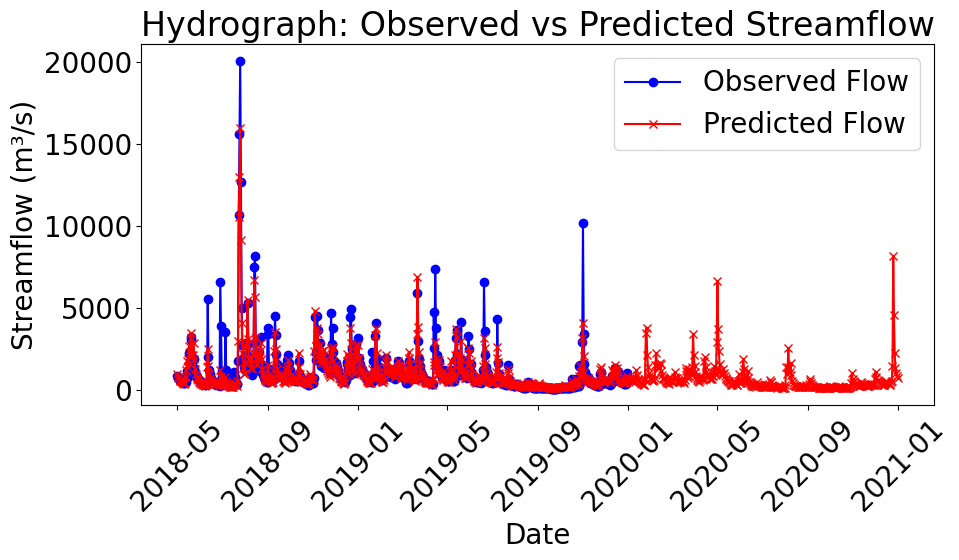

In [22]:
#### plotting for basins.
drop_idx = 14000
basin = 1


# Create a list of datetimes from 1980 to 2021
all_time = pd.date_range(start='1980-01-01', end='2020-12-31', freq='d')
time_list = all_time.to_list()
# len(date_list[:-1])

# Plot the hydrographs
plt.figure(figsize=(10, 6))
plt.plot(time_list[drop_idx:], list(observation[basin,drop_idx:]), label='Observed Flow', marker='o', color='b')
plt.plot(time_list[drop_idx:], dHBVUH_simulation[basin,drop_idx:], label='Predicted Flow', marker='x', color='r')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.title('Hydrograph: Observed vs Predicted Streamflow')
plt.legend()

# Format the date axis
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


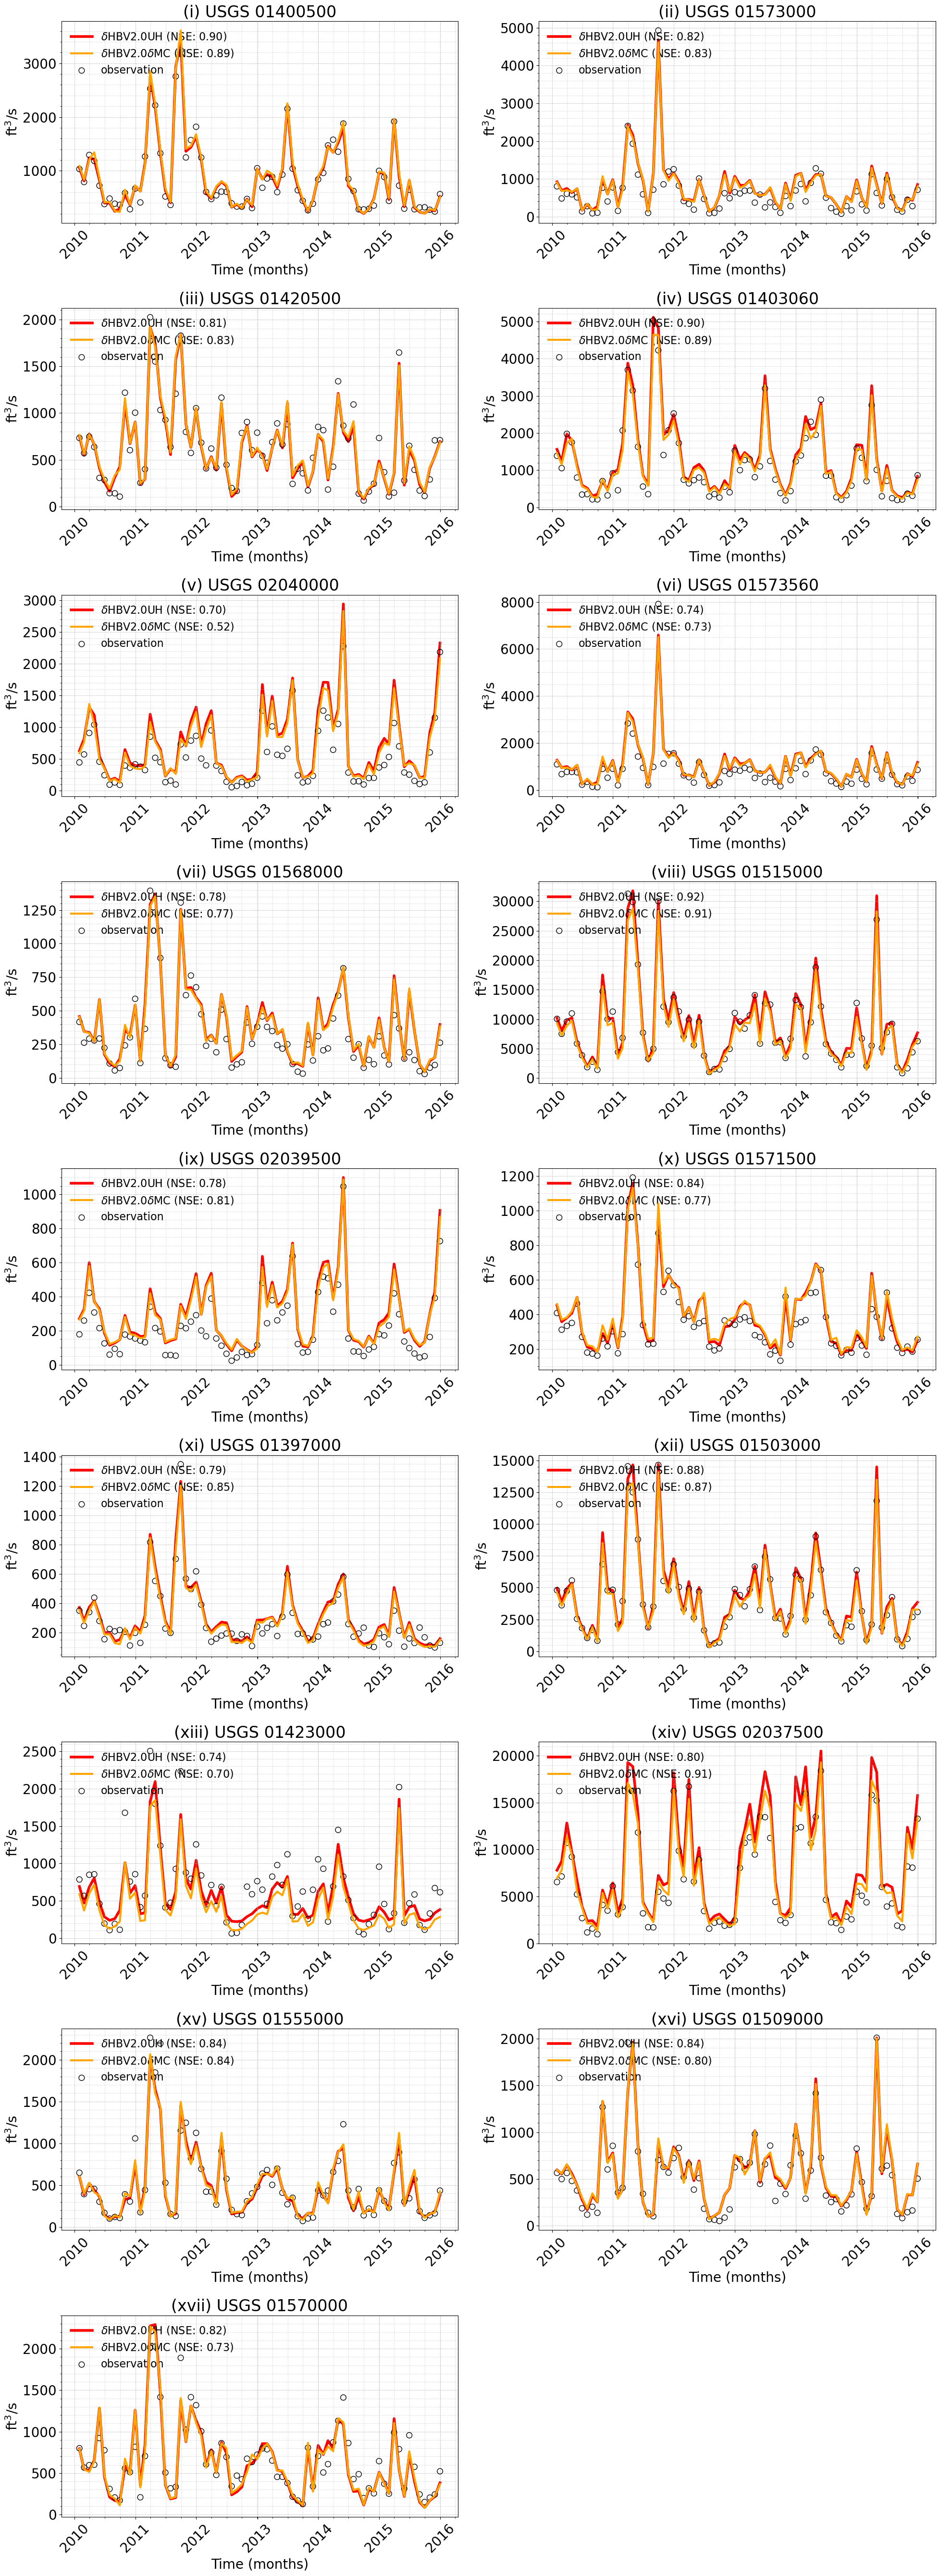

In [57]:
### Time series plot.

# Create a list of datetimes from 1980 to 2021
all_time = pd.date_range(start='1980-01-01', end='2020-12-31', freq='d')
time_list = all_time.to_list()

## Figure inputs
colors = ['red', 'orange','k']
model_name = [
    r'$\delta$HBV2.0UH',
    r'$\delta$HBV2.0$\delta$MC',
    r'observation'
]

t_start = ['2010-01-01']
t_end = ['2016-01-01']
monthly = True


## Get data for time range:
startidx = all_time.get_loc(t_start[0])
endidx = all_time.get_loc(t_end[0])

time = all_time[startidx:endidx]
dHBVUH_sim_slice = dHBVUH_simulation[:, startidx:endidx]
dHBVdMC_sim_slice = dHBVdMC_simulation[:, startidx:endidx]
obs_slice = observation[:, startidx:endidx]

## Calculate NSE for the time range:
NSE_dHBVUH_sub = NSE_calc(dHBVUH_sim_slice,obs_slice)
NSE_dHBVdMC_sub = NSE_calc(dHBVdMC_sim_slice,obs_slice)

dataBoxes = [dHBVUH_sim_slice, dHBVdMC_sim_slice, obs_slice]
NSE_data = [NSE_dHBVUH_sub, NSE_dHBVdMC_sub]


## Format data for greater timesteps:
if monthly:
    for i in range(len(seann_subset)):
        data = pd.DataFrame({
            'date': time,
            'dHBVUH': dHBVUH_sim_slice[i,:],
            'dHBVdMC': dHBVdMC_sim_slice[i,:],
            'obs': obs_slice[i,:]
        })

        data['date'] = pd.to_datetime(data['date'])
        data.set_index('date', inplace=True)

        mo_avg = data.resample('M').mean()

        # dHBVUH_sim_slice[i,:] = mo_avg['dHBVUH']
        # dHBVdMC_sim_slice[i,:] = mo_avg['dHBVdMC']
        # obs_slice[i,:] = mo_avg['obs']

        newlen = len(mo_avg)
        dHBVUH_sim_slice[i, :newlen] = mo_avg['dHBVUH'].values
        dHBVdMC_sim_slice[i, :newlen] = mo_avg['dHBVdMC'].values
        obs_slice[i, :newlen] = mo_avg['obs'].values
    
    time = mo_avg.index
    dataBoxes = [dHBVUH_sim_slice[:,:newlen],
                dHBVdMC_sim_slice[:,:newlen],
                obs_slice[:,:newlen]]


fig_label = ['(i)','(ii)','(iii)','(iv)', '(v)','(vi)','(vii)','(viii)','(ix)',
             '(x)','(xi)','(xii)','(xiii)','(xiv)','(xv)','(xvi)', '(xvii)']
gage_idx = np.arange(0, len(seann_subset))
fontsize = 20
plt.rcParams.update({'font.size': fontsize})



## Create a figure with subplots.
nrows = (len(gage_idx) + 1) // 2
fig, axes = plt.subplots(nrows, 2, figsize=(20, 6*nrows))

axes[8,1].remove()

if len(gage_idx) == 1:
    axes = [axes]  # Convert to list if only one subplot

for i, idx in enumerate(gage_idx):
    ax = axes[i // 2, i % 2]  # Access the correct subplot in 2D array

    for j in range(len(dataBoxes) - 1):
        lw = 3
        marker = None
        ms = None
        zorder =0
        mew = 3
        ls = '-'
        if j == 0:
            lw =4
            marker='o'
            ms = 10
        if j == 1:
            zorder = 6
        if j == 3:
            ls = '-.'
        if j == 2:
            ls = '--'

        # Plot prediction data
        ax.plot(time,
                dataBoxes[j][idx,:],
                label=model_name[j] + f' (NSE: {NSE_data[j][idx]:.2f})',
                color=colors[j],
                # marker = marker,
                mfc='none',
                mew = mew,
                ls = ls,
                ms =ms,
                lw = lw,
                zorder =  zorder)
        
    ## Plot the observation data
    ax.scatter(time,
               dataBoxes[-1][idx,:],
               label=model_name[-1],
               color=colors[-1],
               marker='o',
               s = 70,
               facecolors='none',
               zorder = 4)
    

    ax.set_title(f'{fig_label[i]} USGS {str(seann_subset[i]).zfill(8)}')
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('ft$^3$/s')
    ax.legend(ncol = 1,fontsize = fontsize-4,loc='upper left', frameon = False)
    ax.minorticks_on()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)
    # ax.set_ylim(0, 60000)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "reed_ts.png", dpi=300)
plt.show()

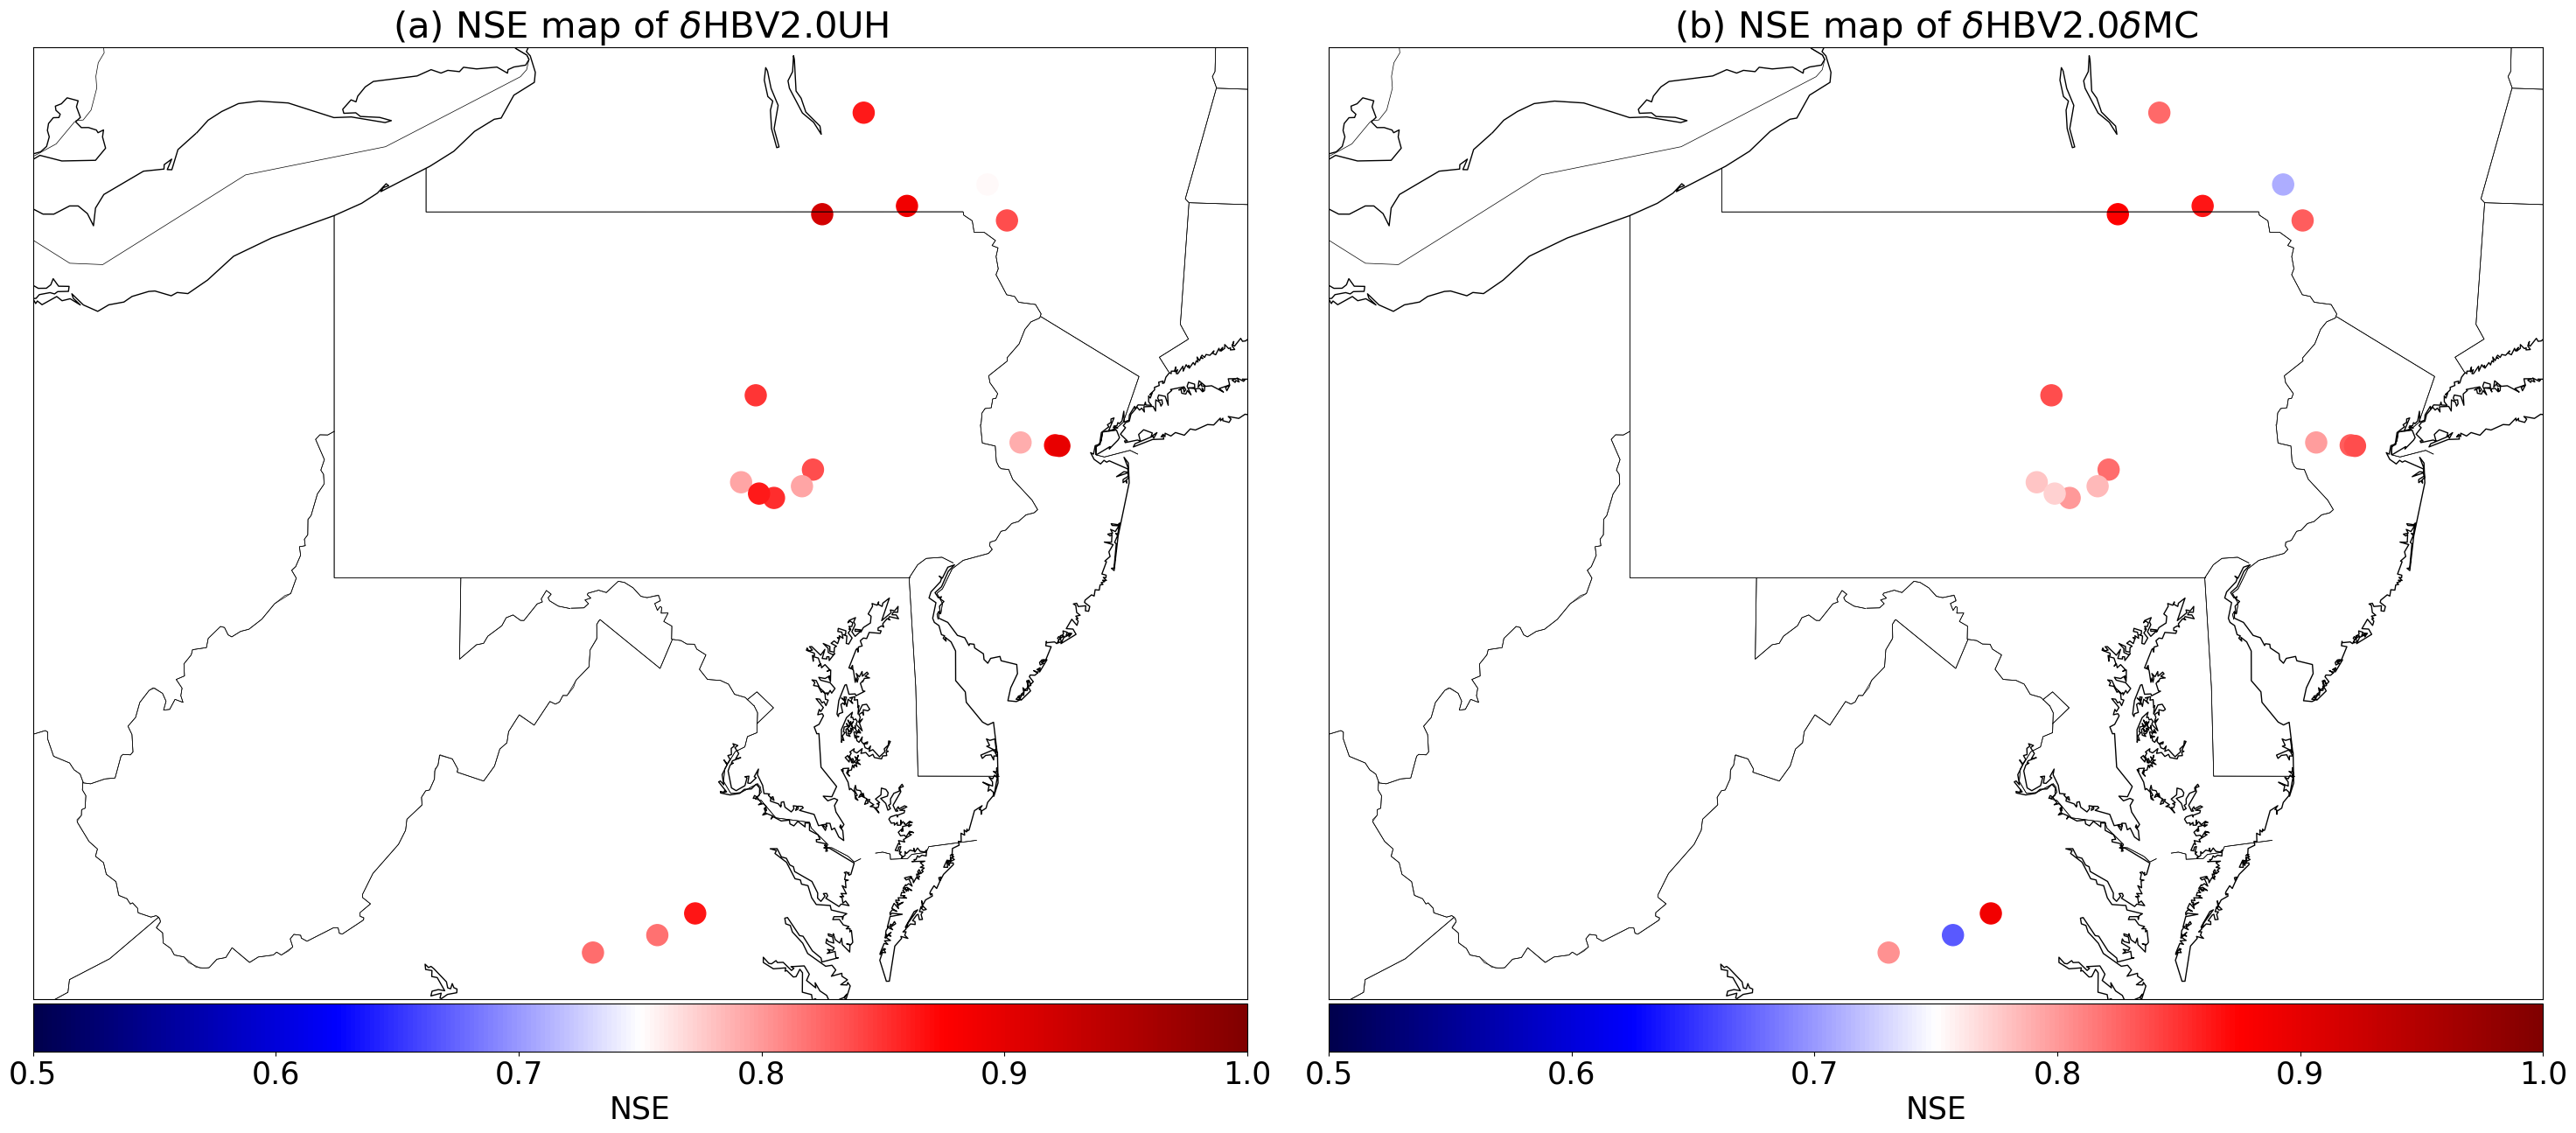

In [91]:
### Station plot
from mpl_toolkits.basemap import Basemap


# Model labels, titles, and data sources
model_label = ['(a)', '(b)']
title = [
    r'NSE map of $\delta$HBV2.0UH',
    r'NSE map of $\delta$HBV2.0$\delta$MC',
    # '$\Delta$NSE map of\n$\delta$HBV2.0$\delta$MC - $\delta$HBV2.0UH'
]

NSE_data = [NSE_dHBVUH[seann_idx], NSE_dHBVdMC[seann_idx]]

fontsize = 25
plt.rcParams.update({'font.size': fontsize})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 30))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot
for i, ax in enumerate(axes.flat):
    m = Basemap(projection='merc', llcrnrlat=37, urcrnrlat=43,
                llcrnrlon=-83, urcrnrlon=-73, resolution='i', ax=ax)
    
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Convert latitude and longitude to x and y coordinates
    x, y = m(np.array(lon)[seann_idx], np.array(lat)[seann_idx])

    # Plot each point, with size and color determined by NSE

    if i == 0 or i == 2 or i == 4  :
        scatter = m.scatter(x, y, s=300, c=NSE_data[i], cmap=plt.cm.seismic, vmin=0.5, vmax=1)
    else:
        scatter = m.scatter(x, y, s=300, c=NSE_data[i], cmap=plt.cm.seismic, vmin=0.5, vmax=1)  #s = np.array(basin_area)[seann_idx]
    
    # Add title and model label
    ax.set_title(f"{model_label[i]} {title[i]}")
    
    # Add a colorbar for each subplot
    cbar = m.colorbar(scatter, location='bottom', pad=0.05)
    if i<4:

        cbar.set_label('NSE')
    else:
        cbar.set_label(r'$\delta$NSE')
plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "NSE_map.png", dpi=300)

# Show the plot
plt.show()

In [9]:
# Bin KGE, NSE stats like Seann:
def bin_stats(values):
    # Define bin edges between 0 and 1 with 5 equal bins
    bin_edges = [-1000.0, 0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
    
    # Use np.digitize to assign each value to a bin
    binned_values = np.digitize(values, bin_edges, right=True)

    # np.digitize assigns bin numbers starting from 1; adjust to start from 0
    return np.clip(binned_values, 1, 7) - 1

KGE_dHBVUH_binned = bin_stats(KGE_dHBVUH)
KGE_dHBVdMC_binned = bin_stats(KGE_dHBVdMC)

NSE_dHBVUH_binned = bin_stats(NSE_dHBVUH)
NSE_dHBVdMC_binned = bin_stats(NSE_dHBVdMC)


# Color coding for plots:
colors = ['peachpuff', 'gold', 'lime', 'lightskyblue', 'dodgerblue', 'mediumorchid', 'rebeccapurple']


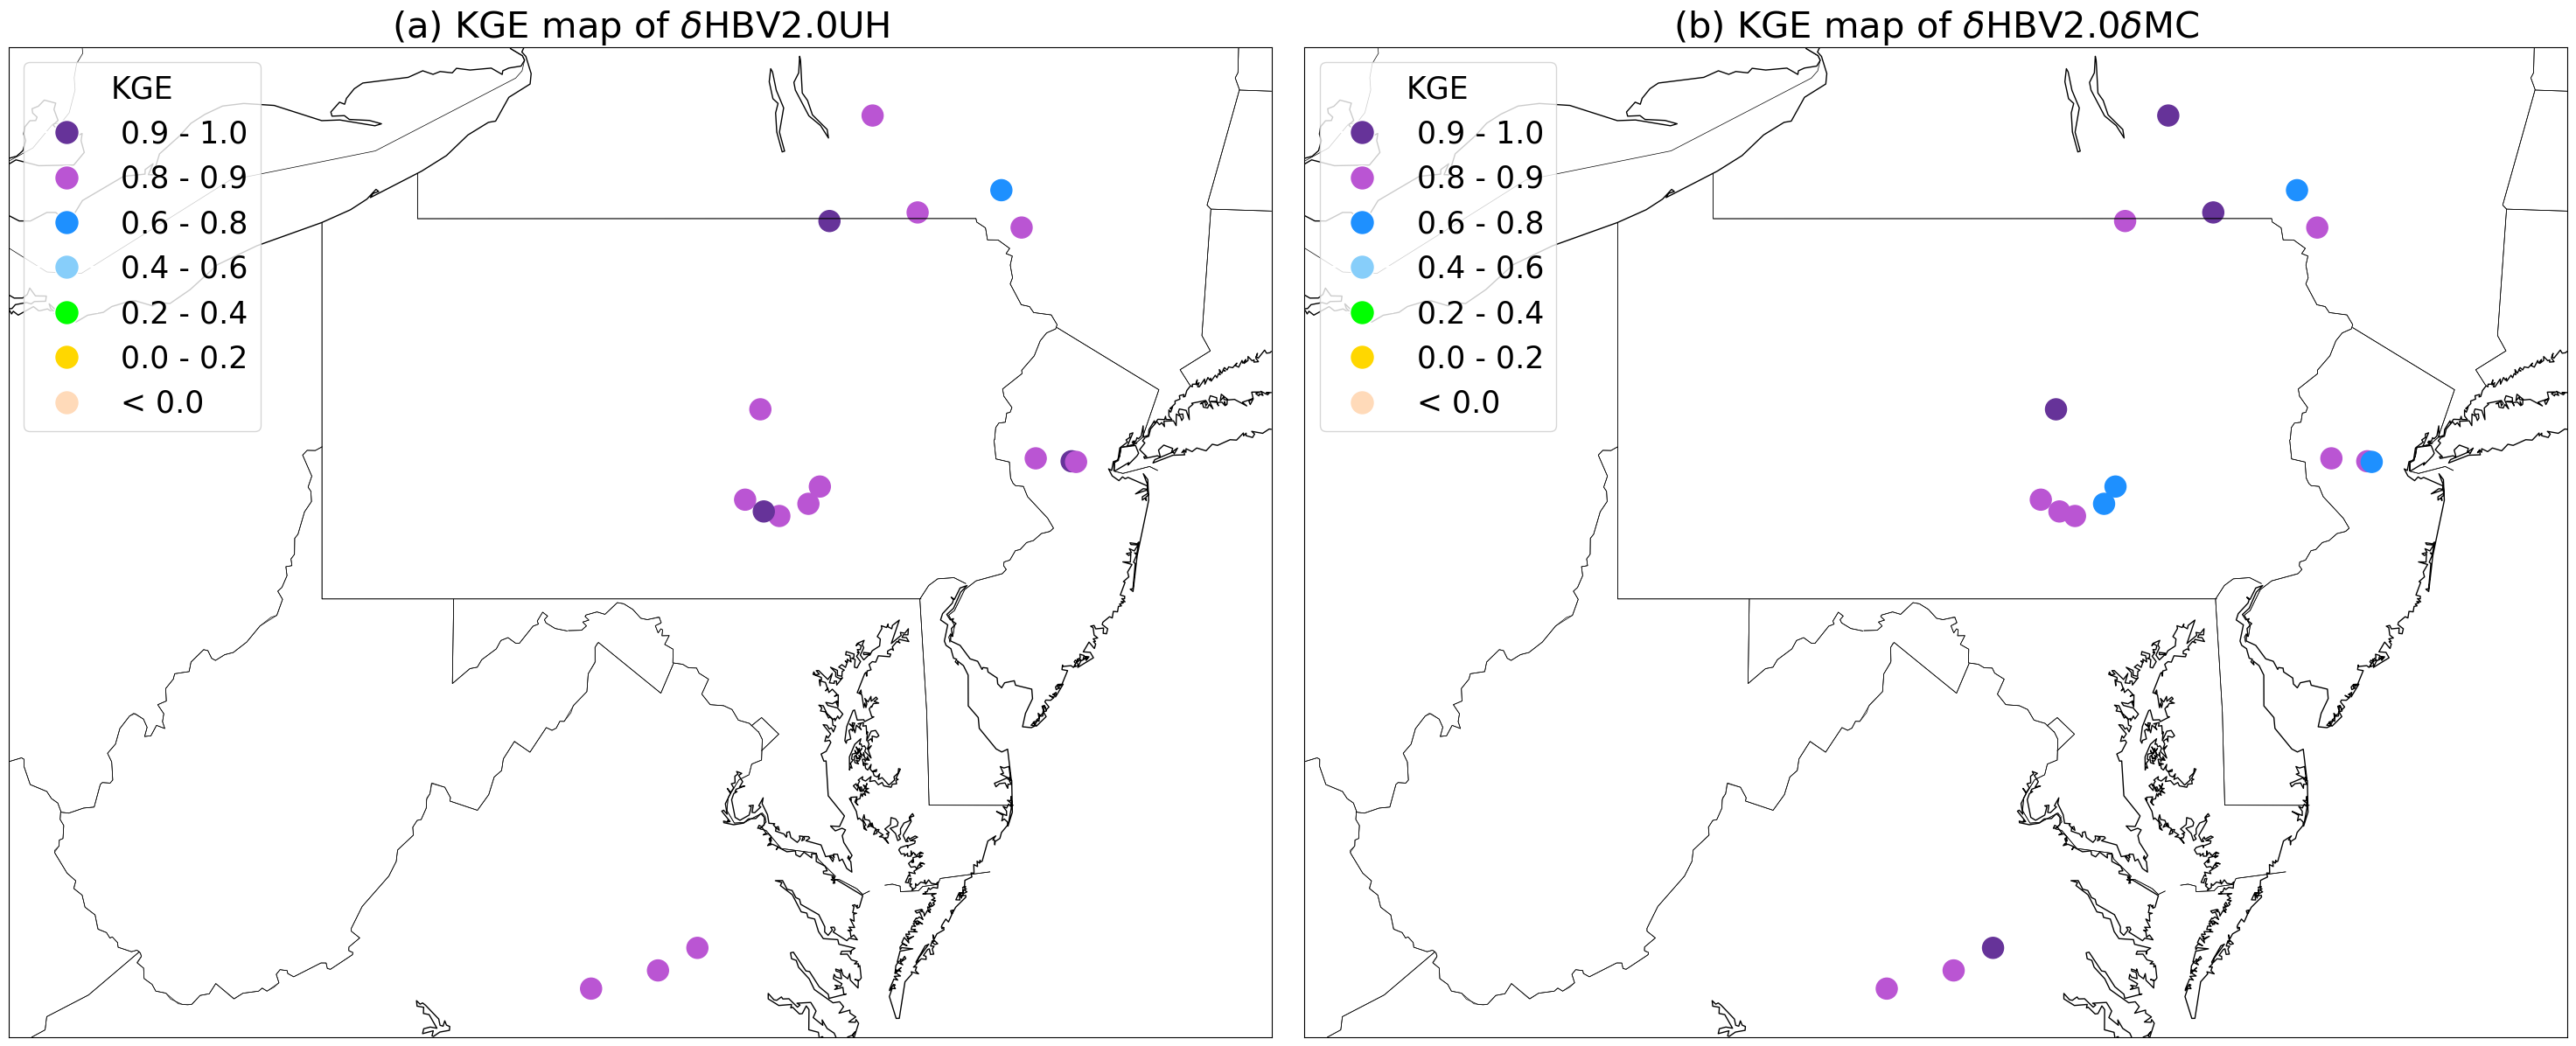

In [10]:
### Station plot
from mpl_toolkits.basemap import Basemap


# Model labels, titles, and data sources
model_label = ['(a)', '(b)']
title = [
    r'KGE map of $\delta$HBV2.0UH',
    r'KGE map of $\delta$HBV2.0$\delta$MC',
]

KGE_data = [KGE_dHBVUH_binned[seann_idx], KGE_dHBVdMC_binned[seann_idx]]

fontsize = 25
plt.rcParams.update({'font.size': fontsize})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 30))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot
for i, ax in enumerate(axes.flat):
    m = Basemap(projection='merc', llcrnrlat=37, urcrnrlat=43,
                llcrnrlon=-83, urcrnrlon=-73, resolution='i', ax=ax)
    
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Convert latitude and longitude to x and y coordinates
    x, y = m(np.array(lon)[seann_idx], np.array(lat)[seann_idx])

    # Plot each point, with size and color determined by KGE.

    if i == 0 or i == 2 or i == 4  :
        scatter = m.scatter(x, y, s=300, c=[colors[b] for b in KGE_data[i]])
    else:
        scatter = m.scatter(x, y, s=300, c=[colors[b] for b in KGE_data[i]])
    
    # Add title and model label
    ax.set_title(f"{model_label[i]} {title[i]}")
    
    # Add color coding for each subplot
    legend_colors = [colors[-i-1] for i in range(7)]
    legend_labels = ['0.9 - 1.0', '0.8 - 0.9', '0.6 - 0.8', '0.4 - 0.6', '0.2 - 0.4', '0.0 - 0.2', '< 0.0']

    # Create legend elements (colored markers for each bin)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, 
                            markerfacecolor=color, markersize=20) 
                    for label, color in zip(legend_labels, legend_colors)]

    # Add the legend to the plot
    ax.legend(handles=legend_elements, title="KGE", loc="upper left")

plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "KGE_map.png", dpi=300)

# Show the plot
plt.show()

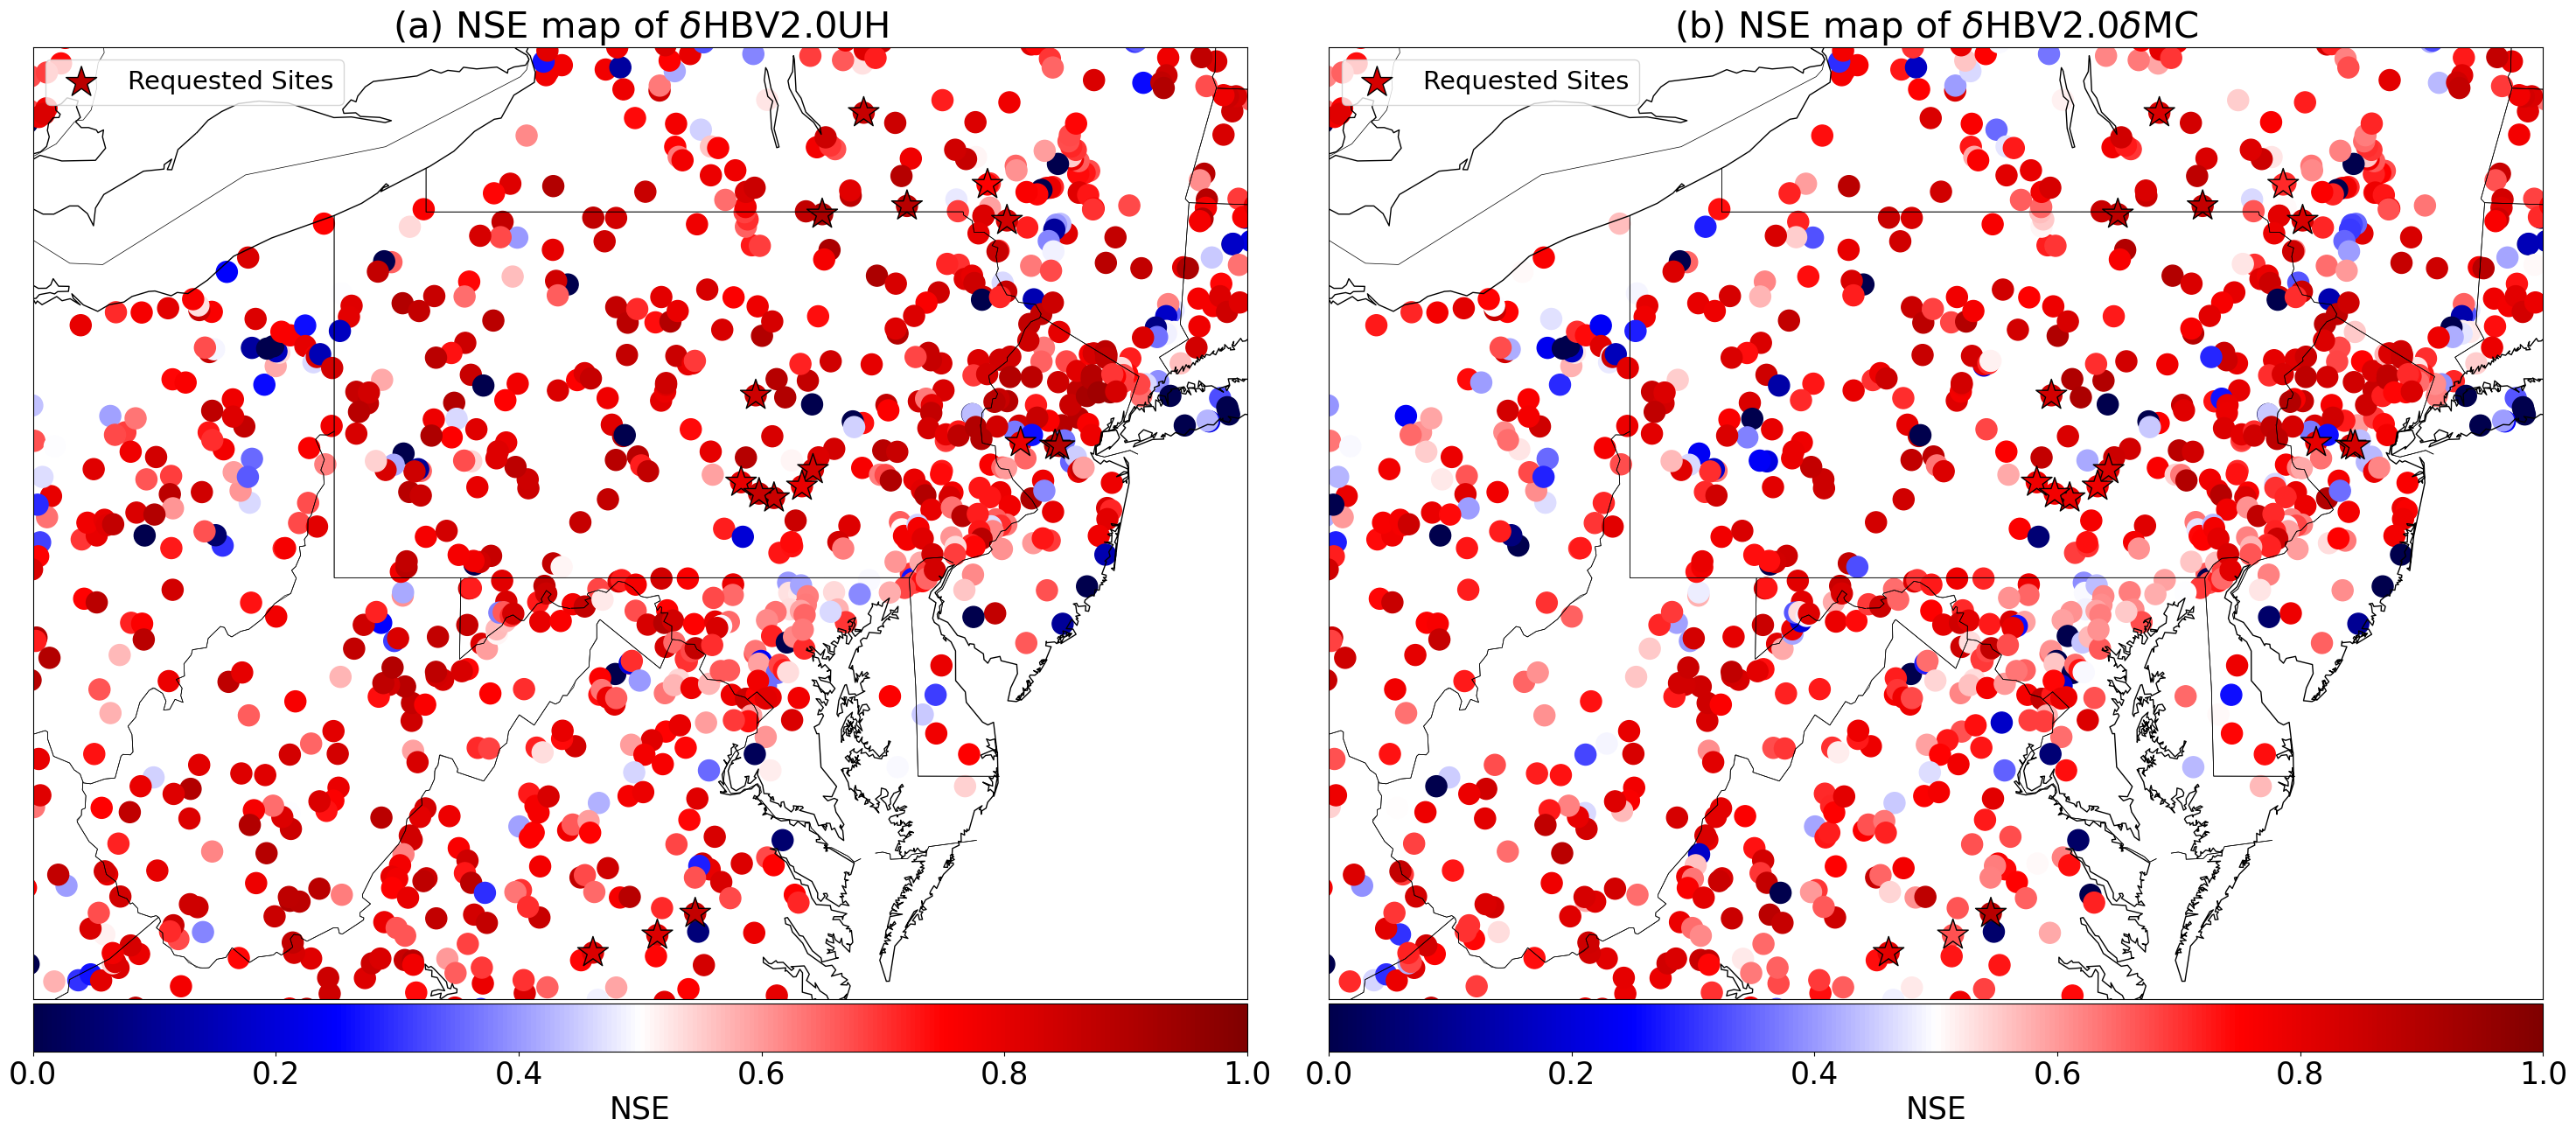

In [125]:
### Station plot
from mpl_toolkits.basemap import Basemap


# Model labels, titles, and data sources
model_label = ['(a)', '(b)']
title = [
    r'NSE map of $\delta$HBV2.0UH',
    r'NSE map of $\delta$HBV2.0$\delta$MC',
    # '$\Delta$NSE map of\n$\delta$HBV2.0$\delta$MC - $\delta$HBV2.0UH'
]

NSE_data = [NSE_dHBVUH, NSE_dHBVdMC]

fontsize = 25
plt.rcParams.update({'font.size': fontsize})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot
for i, ax in enumerate(axes.flat):
    m = Basemap(projection='merc', llcrnrlat=37, urcrnrlat=43,
                llcrnrlon=-83, urcrnrlon=-73, resolution='i', ax=ax)
    
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Convert latitude and longitude to x and y coordinates
    x, y = m(np.array(lon), np.array(lat))

    # Plot each point, with size and color determined by NSE

    if i == 0 or i == 2 or i == 4  :
        scatter = m.scatter(x, y, s=300, c=NSE_data[i], cmap=plt.cm.seismic, vmin=0, vmax=1)
    else:
        scatter = m.scatter(x, y, s=300, c=NSE_data[i], cmap=plt.cm.seismic, vmin=0, vmax=1)  #s = np.array(basin_area)[seann_idx]
    
    ## For Seann's basins
    m.scatter(x[seann_idx],
              y[seann_idx],
              s=700,
              c=NSE_data[i][seann_idx],
              cmap=plt.cm.seismic,
              marker='*',
              edgecolor='black',
              label='Requested Sites',
              vmin=0, vmax=1)  #s = np.array(basin_area)[seann_idx]

    # Add title and model label
    ax.set_title(f"{model_label[i]} {title[i]}")
    ax.legend(ncol = 1,fontsize = fontsize-4,loc='upper left', frameon = True)

    
    # Add a colorbar for each subplot
    cbar = m.colorbar(scatter, location='bottom', pad=0.05)
    if i<4:

        cbar.set_label('NSE')
    else:
        cbar.set_label(r'$\delta$NSE')

plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "NSE_map_region.png", dpi=300)

# Show the plot
plt.show()


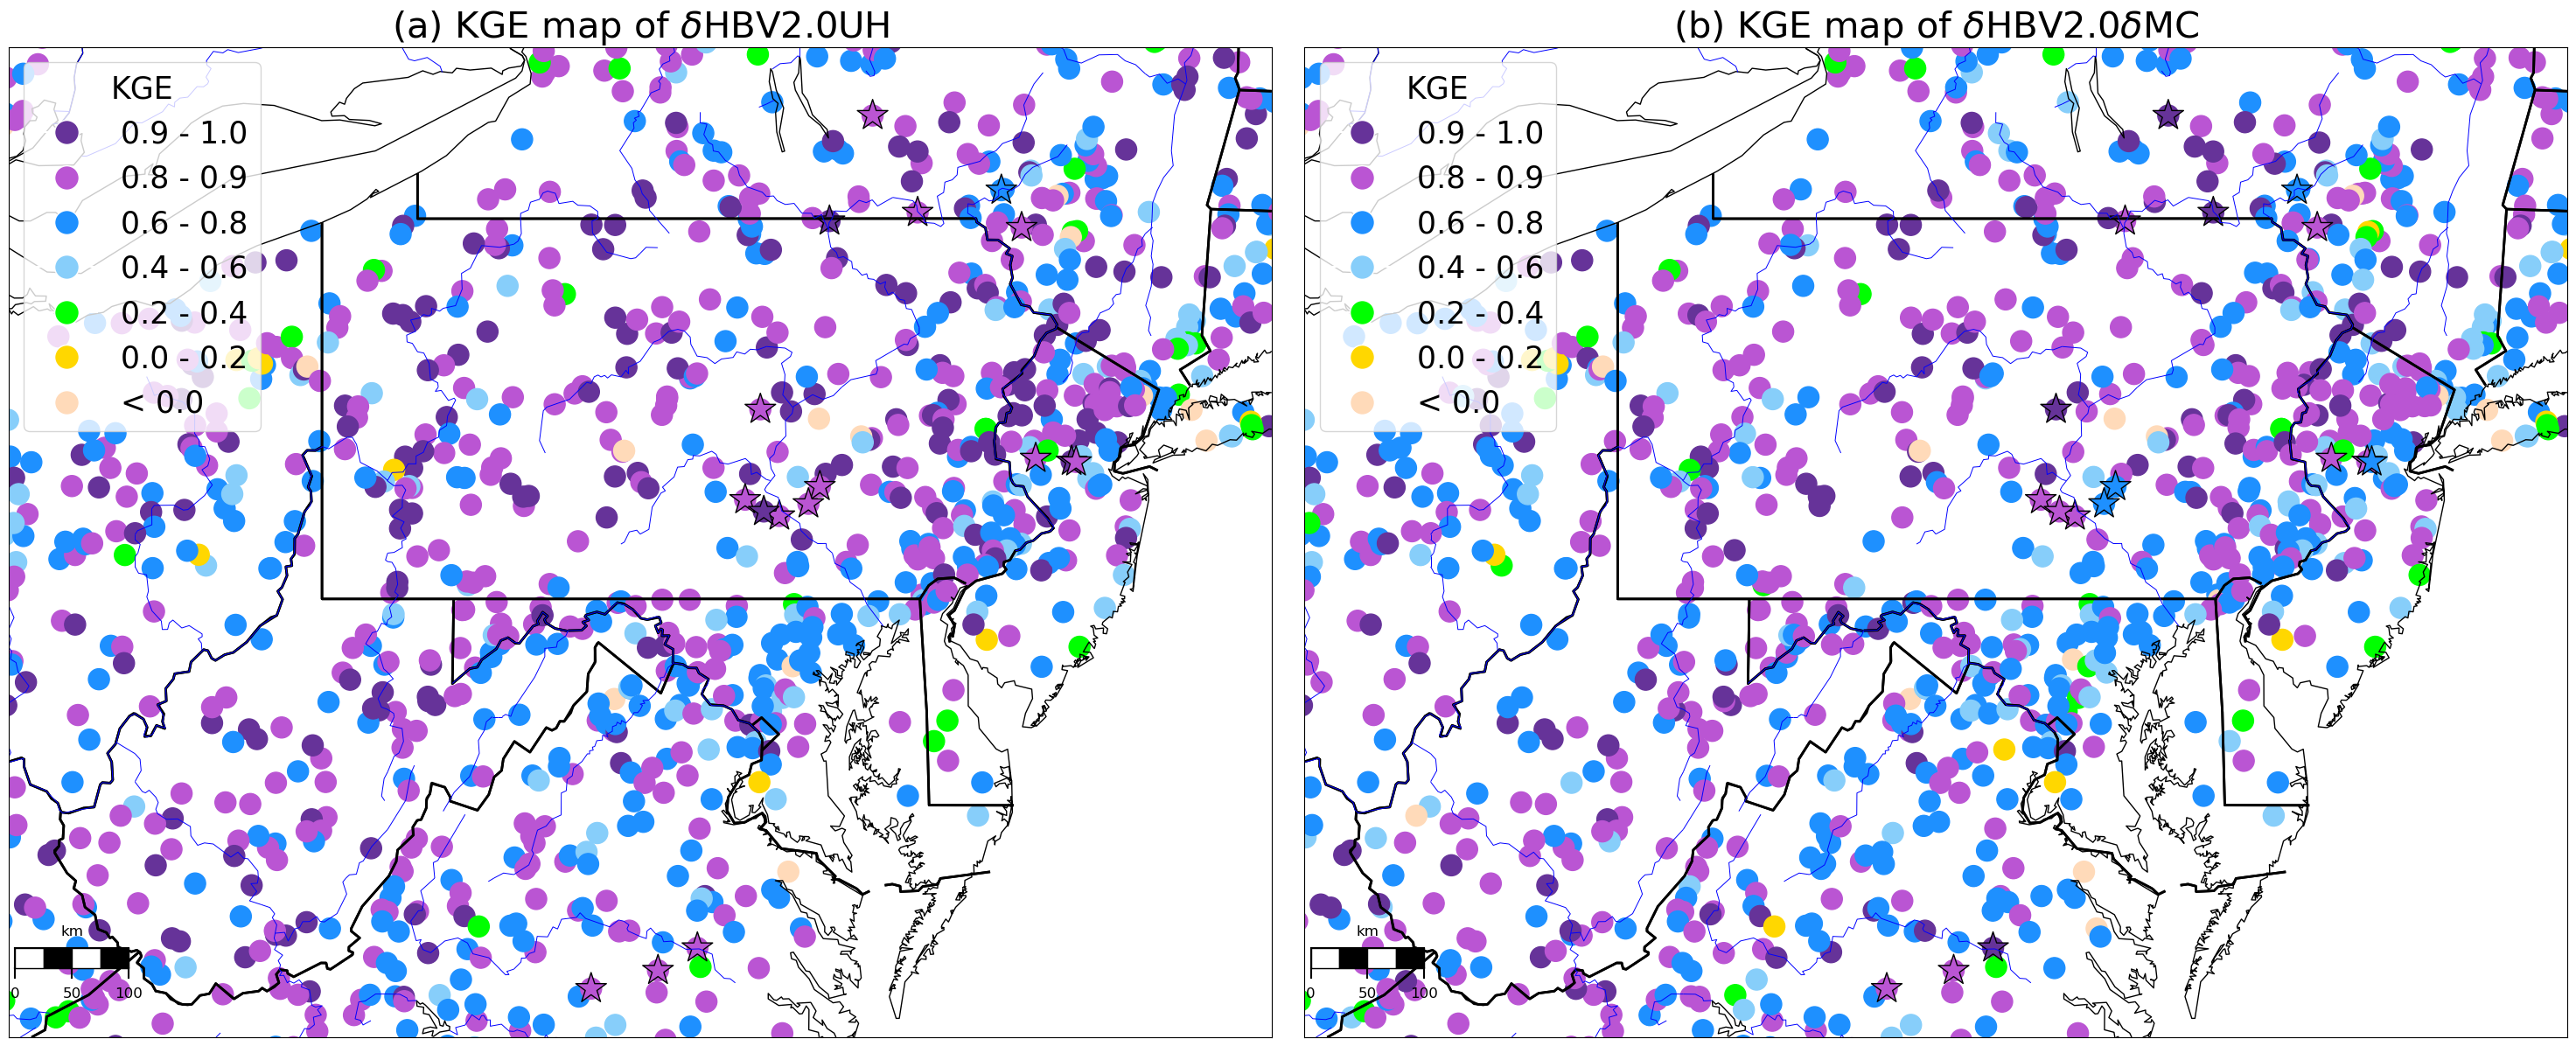

In [11]:
### Station plot
from mpl_toolkits.basemap import Basemap


# Model labels, titles, and data sources
model_label = ['(a)', '(b)']
title = [
    r'KGE map of $\delta$HBV2.0UH',
    r'KGE map of $\delta$HBV2.0$\delta$MC',
    # '$\Delta$NSE map of\n$\delta$HBV2.0$\delta$MC - $\delta$HBV2.0UH'
]


KGE_data = [KGE_dHBVUH_binned, KGE_dHBVdMC_binned]

fontsize = 25
plt.rcParams.update({'font.size': fontsize})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot
for i, ax in enumerate(axes.flat):
    m = Basemap(projection='merc', llcrnrlat=37, urcrnrlat=43,
                llcrnrlon=-83, urcrnrlon=-73, resolution='i', ax=ax)
    
    m.drawcoastlines(linewidth=1.0)
    m.drawcountries(linewidth=1.0)
    m.drawstates(linewidth=2.0, color='black')
    m.drawrivers(linewidth=0.7, color='blue')
    m.drawmapscale(-82.5, 37.5, -82.5, 37.5, 100, barstyle='fancy', fontsize=12, zorder=5)
    
    # Convert latitude and longitude to x and y coordinates
    x, y = m(np.array(lon), np.array(lat))

    # Plot each point, with size and color determined by NSE

    if i == 0 or i == 2 or i == 4  :
        scatter = m.scatter(x, y, s=300, c=[colors[b] for b in KGE_data[i]])
    else:
        scatter = m.scatter(x, y, s=300, c=[colors[b] for b in KGE_data[i]])
    
    ## For Seann's basins
    m.scatter(x[seann_idx],
              y[seann_idx],
              s=700,
              c=[colors[b] for b in KGE_data[i][seann_idx]],
              marker='*',
              edgecolor='black',
              label='Requested Sites')

    # Add title and model label
    ax.set_title(f"{model_label[i]} {title[i]}")

    # Add color coding for each subplot
    legend_colors = [colors[-i-1] for i in range(7)]
    legend_labels = ['0.9 - 1.0', '0.8 - 0.9', '0.6 - 0.8', '0.4 - 0.6', '0.2 - 0.4', '0.0 - 0.2', '< 0.0']

    # Create legend elements (colored markers for each bin)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, 
                            markerfacecolor=color, markersize=20) 
                    for label, color in zip(legend_labels, legend_colors)]

    # Add the legend to the plot
    ax.legend(handles=legend_elements, title="KGE", loc="upper left")

plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "KGE_map_region.png", dpi=300)

# Show the plot
plt.show()


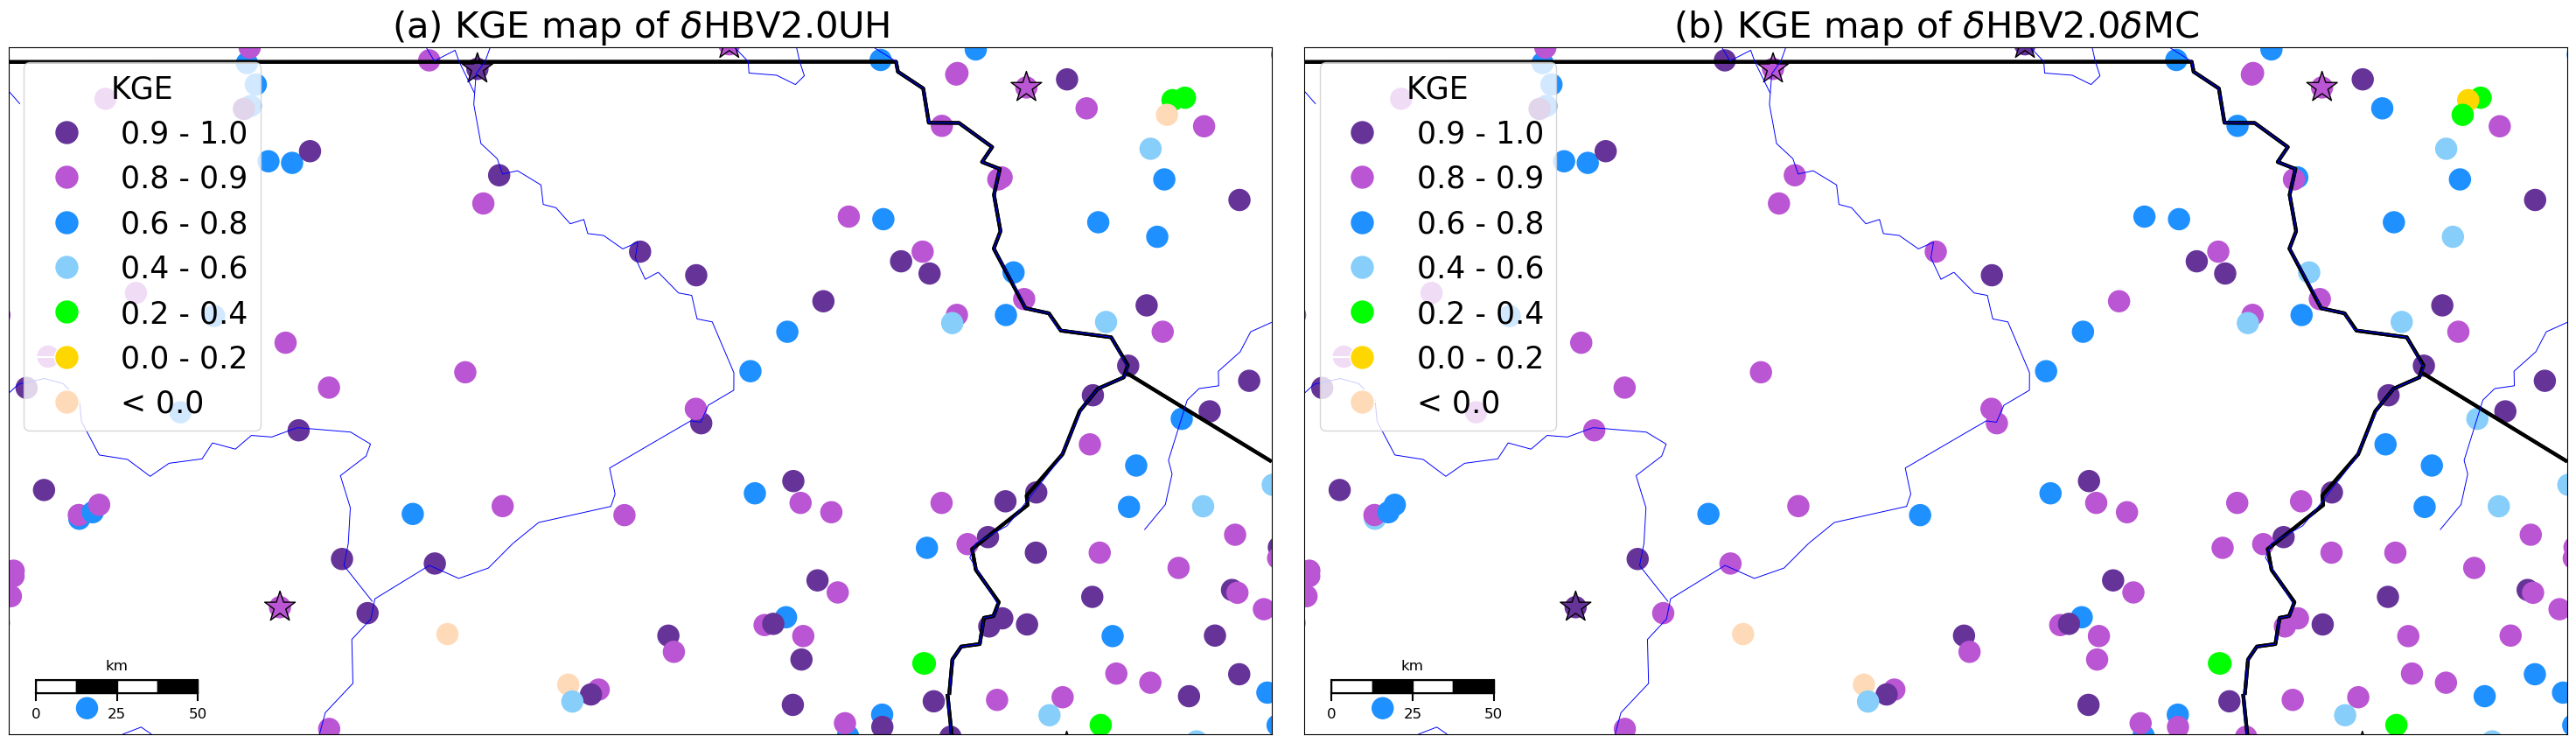

In [12]:
### Station plot
from mpl_toolkits.basemap import Basemap


# Model labels, titles, and data sources
model_label = ['(a)', '(b)']
title = [
    r'KGE map of $\delta$HBV2.0UH',
    r'KGE map of $\delta$HBV2.0$\delta$MC',
    # '$\Delta$NSE map of\n$\delta$HBV2.0$\delta$MC - $\delta$HBV2.0UH'
]


KGE_data = [KGE_dHBVUH_binned, KGE_dHBVdMC_binned]

fontsize = 25
plt.rcParams.update({'font.size': fontsize})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot
for i, ax in enumerate(axes.flat):
    m = Basemap(projection='merc', llcrnrlat=40.6, urcrnrlat=42.03,
            llcrnrlon=-77.8, urcrnrlon=-74.3, resolution='i', ax=ax)
    
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates(linewidth=3.0, color='black')
    m.drawrivers(linewidth=0.7, color='blue')
    m.drawmapscale(-77.5, 40.7, -77.5, 40.7, 50, barstyle='fancy', units='km', fontsize=12)
    
    # Convert latitude and longitude to x and y coordinates
    x, y = m(np.array(lon), np.array(lat))

    # Plot each point, with size and color determined by NSE

    if i == 0 or i == 2 or i == 4  :
        scatter = m.scatter(x, y, s=300, c=[colors[b] for b in KGE_data[i]])
    else:
        scatter = m.scatter(x, y, s=300, c=[colors[b] for b in KGE_data[i]])
    
    ## For Seann's basins
    m.scatter(x[seann_idx],
              y[seann_idx],
              s=700,
              c=[colors[b] for b in KGE_data[i][seann_idx]],
              marker='*',
              edgecolor='black',
              label='Requested Sites')

    # Add title and model label
    ax.set_title(f"{model_label[i]} {title[i]}")

    # Add color coding for each subplot
    legend_colors = [colors[-i-1] for i in range(7)]
    legend_labels = ['0.9 - 1.0', '0.8 - 0.9', '0.6 - 0.8', '0.4 - 0.6', '0.2 - 0.4', '0.0 - 0.2', '< 0.0']

    # Create legend elements (colored markers for each bin)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, 
                            markerfacecolor=color, markersize=20) 
                    for label, color in zip(legend_labels, legend_colors)]

    # Add the legend to the plot
    ax.legend(handles=legend_elements, title="KGE", loc="upper left")

plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "KGE_map_zoom.png", dpi=300)

# Show the plot
plt.show()


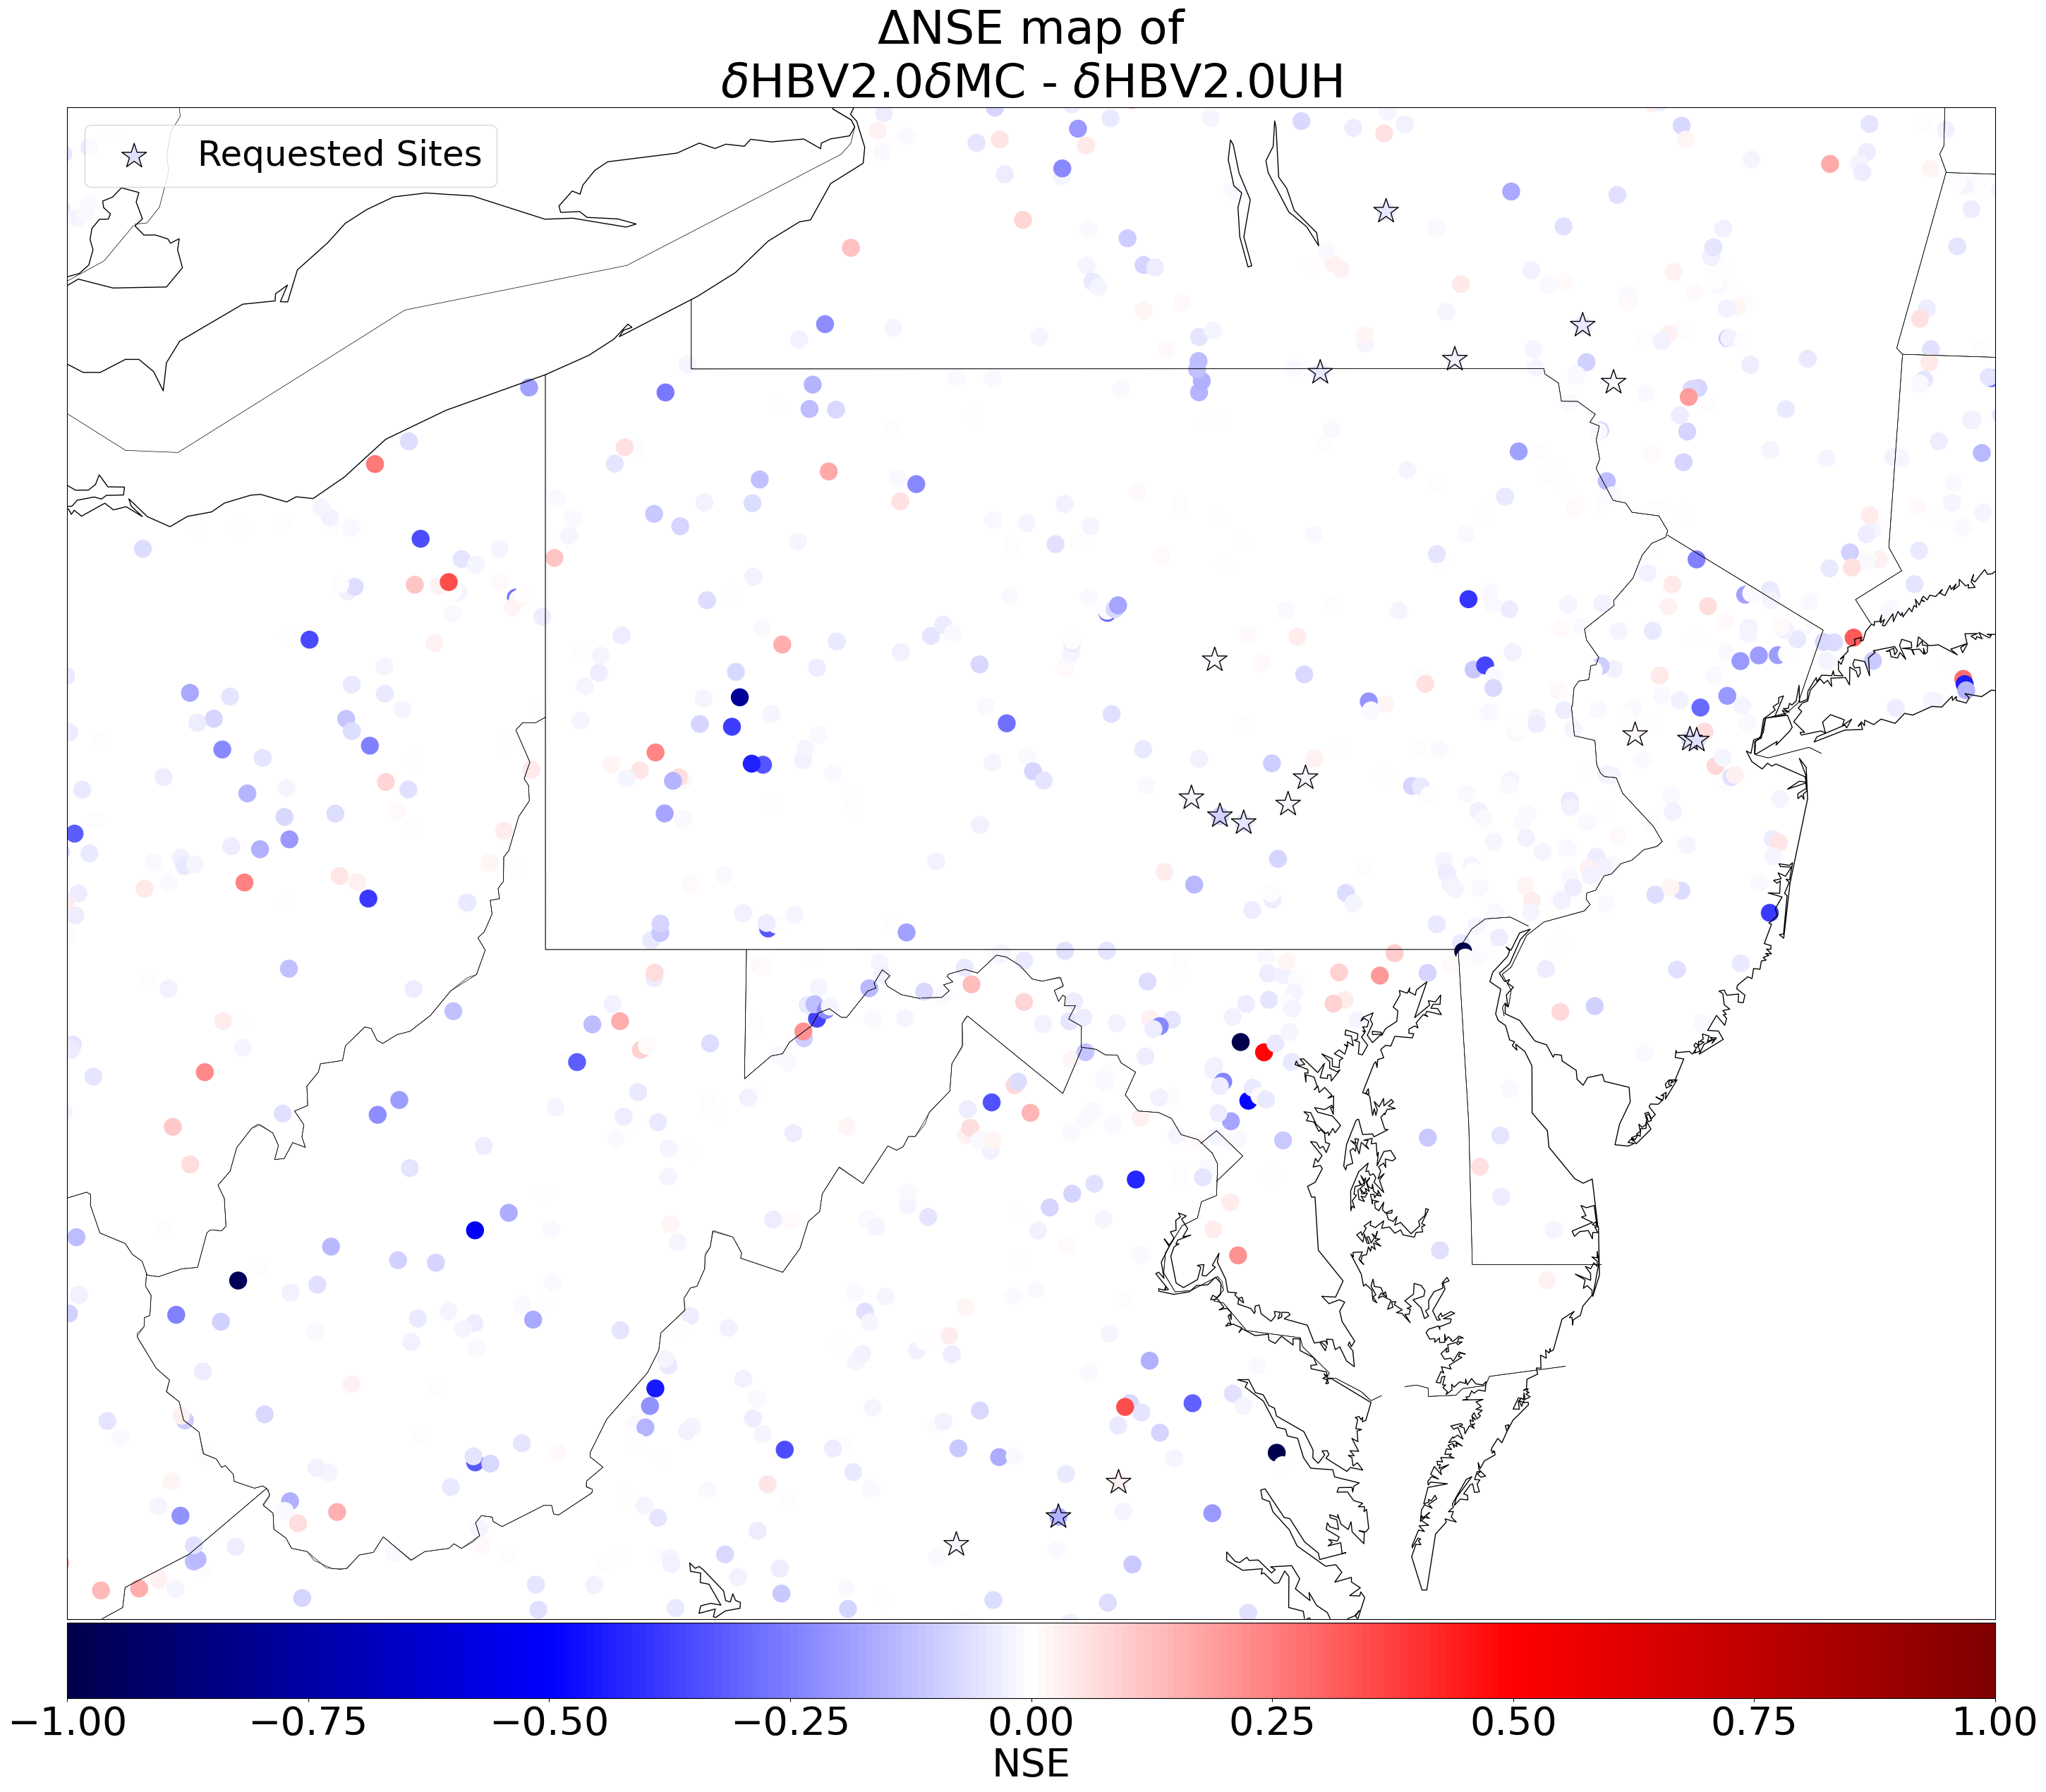

In [116]:
### Station plot
from mpl_toolkits.basemap import Basemap


NSE_data = [NSE_dHBVUH, NSE_dHBVdMC]

fontsize = 40
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot

m = Basemap(projection='merc', llcrnrlat=37, urcrnrlat=43,
            llcrnrlon=-83, urcrnrlon=-73, resolution='i', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert latitude and longitude to x and y coordinates
x, y = m(np.array(lon), np.array(lat))

# Plot each point, with size and color determined by NSE

scatter = m.scatter(x, y, s=300, c=NSE_data[1] - NSE_data[0], cmap=plt.cm.seismic, vmin=-1, vmax=1)

## For Seann's basins
m.scatter(x[seann_idx],
            y[seann_idx],
            s=700,
            c=NSE_data[1][seann_idx] - NSE_data[0][seann_idx],
            cmap=plt.cm.seismic,
            marker='*',
            edgecolor='black',
            label='Requested Sites',
            vmin=-1, vmax=1)  #s = np.array(basin_area)[seann_idx]

# Add title and model label
ax.set_title(f"$\Delta$NSE map of\n$\delta$HBV2.0$\delta$MC - $\delta$HBV2.0UH")
ax.legend(ncol = 1,fontsize = fontsize-4,loc='upper left', frameon = True)

# Add a colorbar for each subplot
cbar = m.colorbar(scatter, location='bottom', pad=0.05)
if i<4:

    cbar.set_label('NSE')
else:
    cbar.set_label(r'$\delta$NSE')

plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "NSE_map_region_diff.png", dpi=300)

# Show the plot
plt.show()


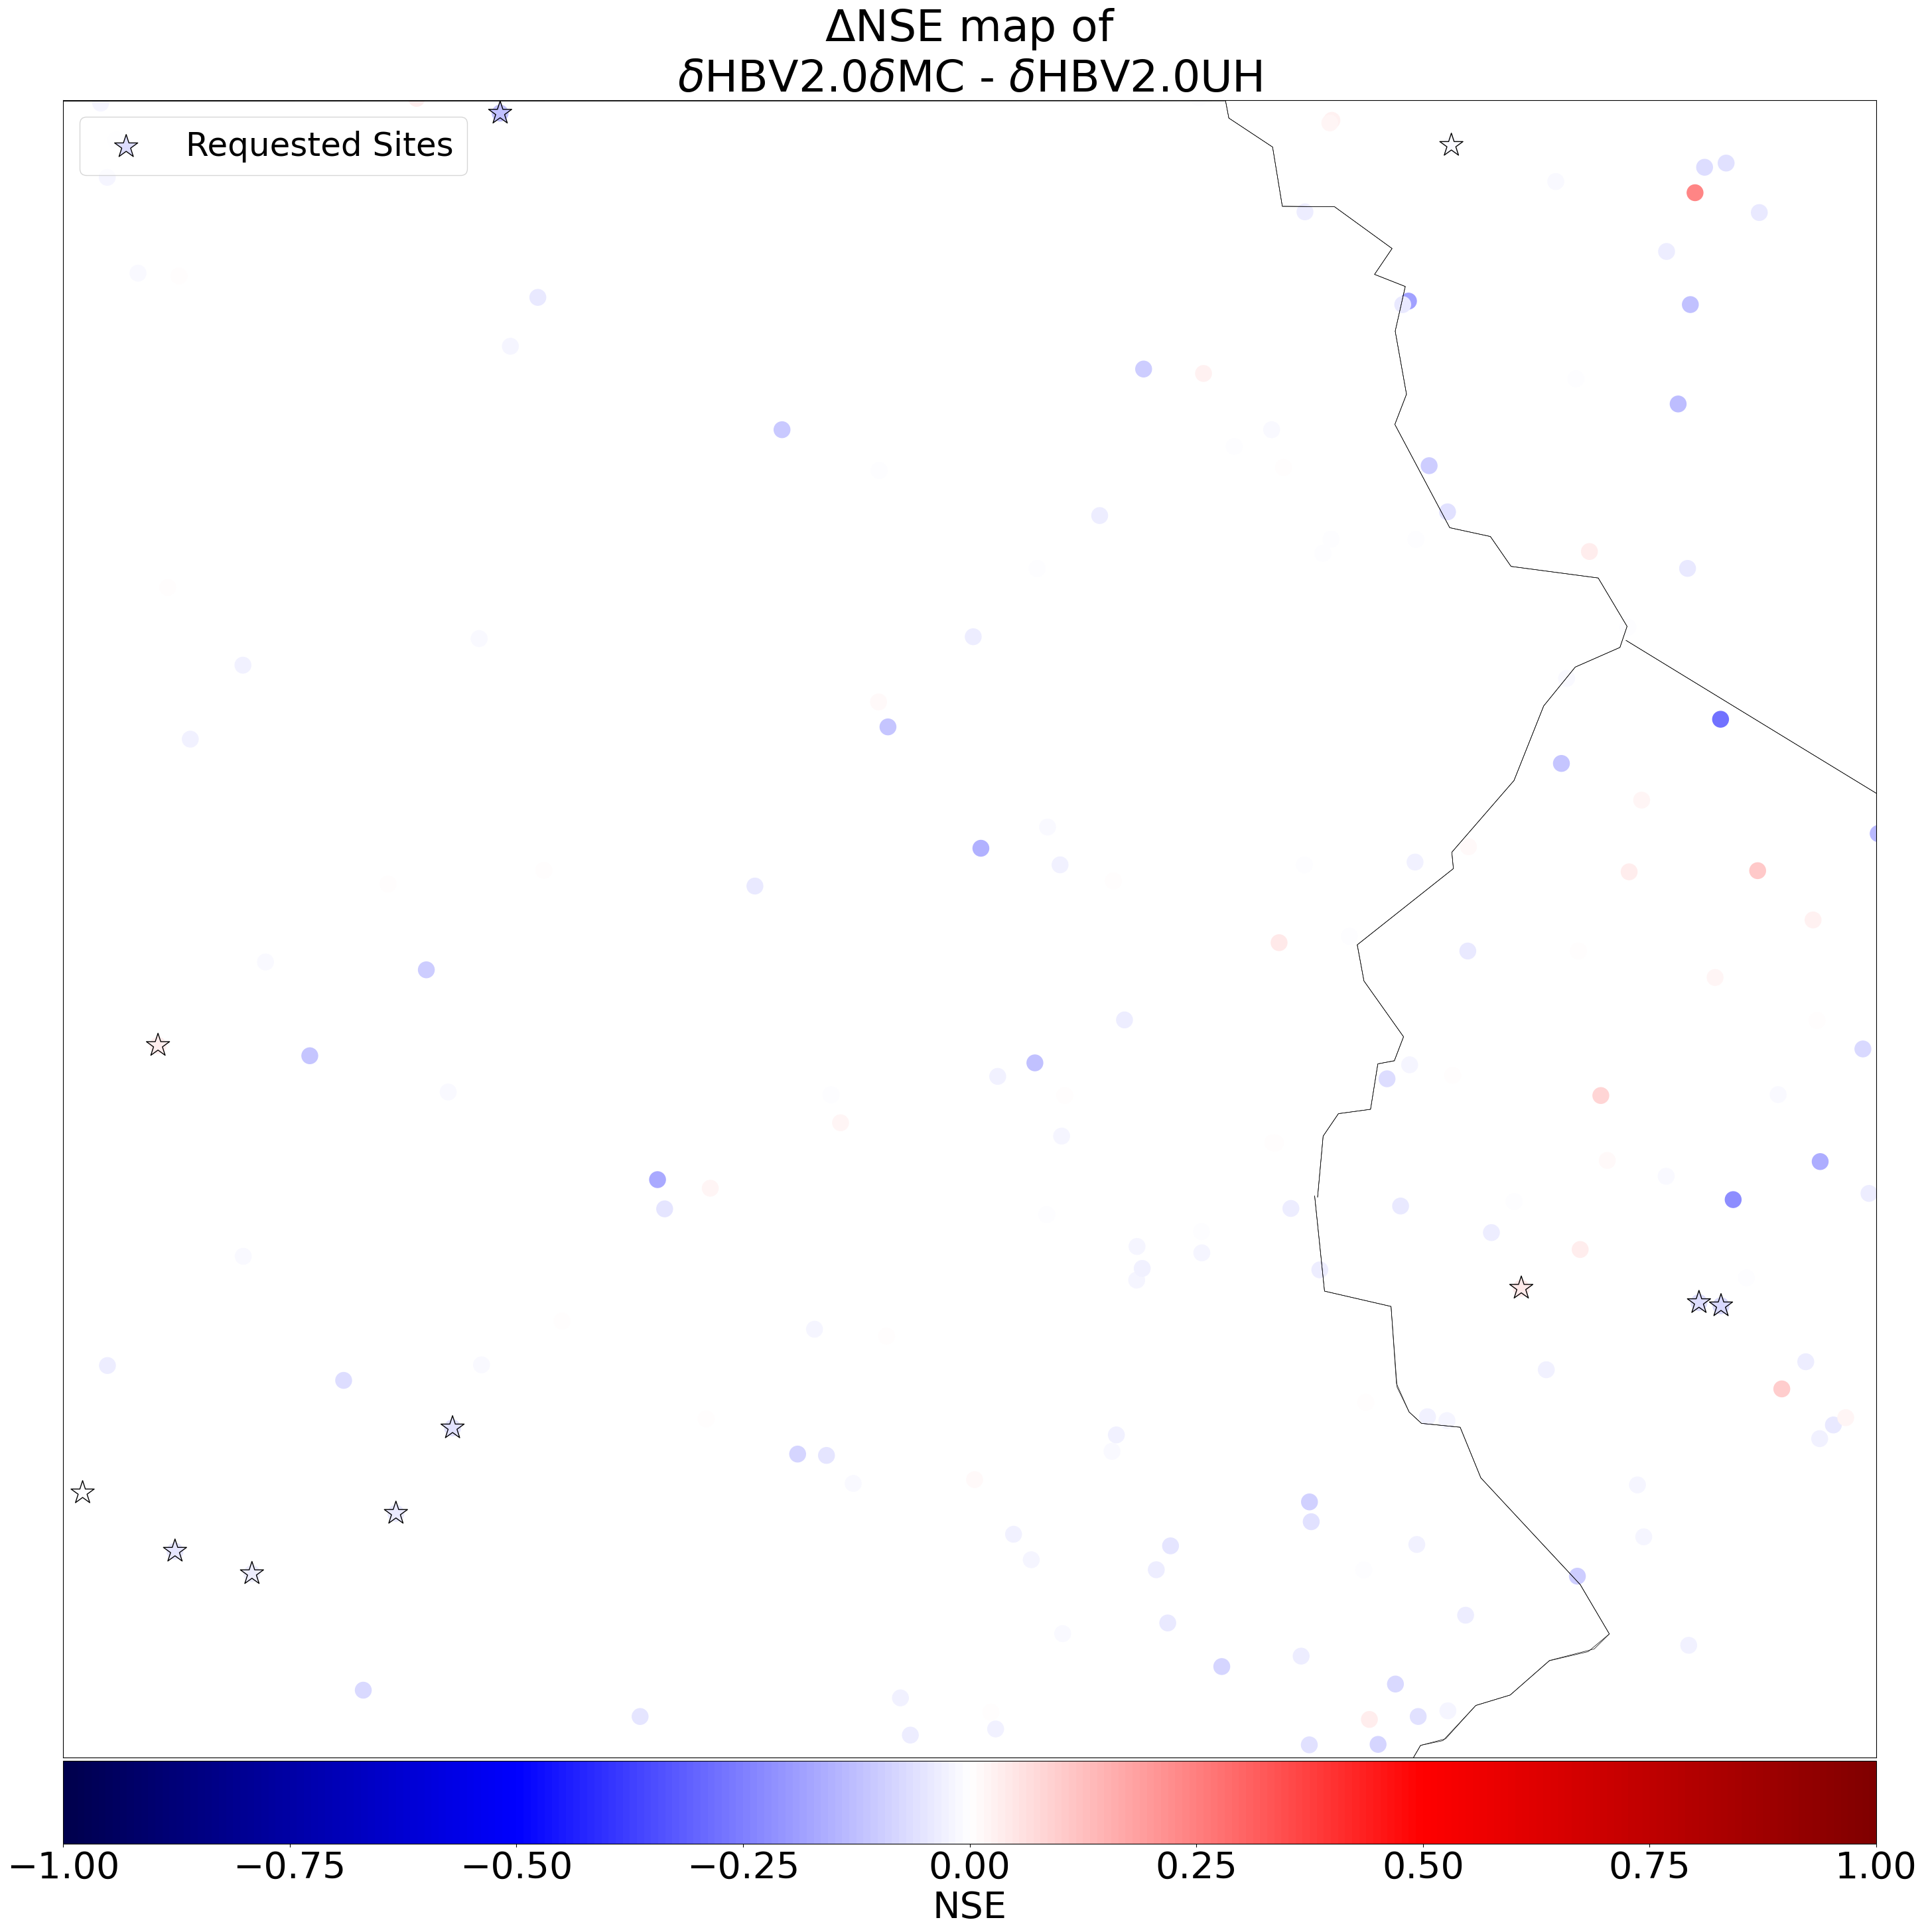

In [124]:
### Station plot
from mpl_toolkits.basemap import Basemap


KGE_data = [KGE_dHBVUH_binned, KGE_dHBVdMC_binned]

fontsize = 40
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))  # Create 2x2 subplots

# Iterate over each model to create its respective subplot

m = Basemap(projection='merc', llcrnrlat=40, urcrnrlat=42,
            llcrnrlon=-77.2, urcrnrlon=-74.3, resolution='i', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert latitude and longitude to x and y coordinates
x, y = m(np.array(lon), np.array(lat))

# Plot each point, with size and color determined by NSE

scatter = m.scatter(x, y, s=300, c=KGE_data[1] - KGE_data[0], cmap=plt.cm.seismic, vmin=-1, vmax=1)

## For Seann's basins
m.scatter(x[seann_idx],
            y[seann_idx],
            s=700,
            c=KGE_data[1][seann_idx] - KGE_data[0][seann_idx],
            cmap=plt.cm.seismic,
            marker='*',
            edgecolor='black',
            label='Requested Sites',
            vmin=-1, vmax=1)  #s = np.array(basin_area)[seann_idx]

# Add title and model label
ax.set_title(f"$\Delta$NSE map of\n$\delta$HBV2.0$\delta$MC - $\delta$HBV2.0UH")

# Add color coding for each subplot
legend_colors = [colors[-i-1] for i in range(7)]
legend_labels = ['1.0 - 0.9', '0.9 - 0.8', '0.8 - 0.6', '0.6 - 0.4', '0.4 - 0.2', '0.2 - 0.0', '< 0.0']

# Create legend elements (colored markers for each bin)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, 
                        markerfacecolor=color, markersize=20) 
                for label, color in zip(legend_labels, legend_colors)]

# Add the legend to the plot
ax.legend(handles=legend_elements, title="KGE", loc="upper left")

plt.tight_layout()

# Save the figure
plt.savefig('/home/lglonzarich/projects/data_extraction/gages_2/reed_sites_plots/' + "KGE_map_zoom.png", dpi=300)

# Show the plot
plt.show()

In [70]:
## Identify Seann's basins in the streamflow simulation.
# seann_subset = ['01400500', '01573000', '01420500', '01513500', '01403060', '01400000', '02040000', '01573560', '01568000', '01515000', '02039500', '01564512', '01571500', '01397000', '01402000', '01503000', '01423000', '02037500', '01555000', '01509000', '01570000']
seann_subset = ['01400500', '01573000', '01420500', '01403060', '02040000', '01573560', '01568000', '01515000', '02039500', '01571500', '01397000', '01503000', '01423000', '02037500', '01555000', '01509000', '01570000']

att = pd.read_csv('/projects/mhpi/yxs275/Data/GAGES_2/all_gages_info.csv')

usgs_id = 2040000

list(att['STATID']).index(usgs_id)

att[att['STATID'] == usgs_id]

STATID  DRAIN_SQKM   LAT_GAGE   LNG_GAGE
1213  2040000      1878.6  37.421538 -77.858888

In [71]:
import pandas as pd 
import numpy as np
import os 
from tqdm import tqdm
import json



area_info_path = '/projects/mhpi/data/MERIT/gage_information/MERIT_basin_area_info'

uparea_info_path = '/projects/mhpi/hjj5218/source_data/csv_file/uparea'

area_info = []
for i in range(1,10):
    _area = pd.read_csv(os.path.join(area_info_path,'COMID_'+str(i)+'.csv'))[['COMID','unitarea']]
    area_info.append(_area)

uparea_info = []
for i in range(1,10):
    _uparea = pd.read_csv(os.path.join(uparea_info_path,'COMID'+str(i)+'.txt'))[['COMID','uparea']]
    uparea_info.append(_uparea)


area_info_global = pd.concat(area_info,axis = 0)
uparea_info_global = pd.concat(uparea_info,axis=0)

In [17]:
area_info_global #[area_info_global['COMID']=='1017000']

COMID   unitarea
0      11000001  10.641684
1      11000002   0.432437
2      11000003   3.935880
3      11000004  40.743122
4      11000005   0.544127
...         ...        ...
42255  91042257  25.091221
42256  91042258  26.943143
42257  91042259  26.674230
42258  91042260  25.119107
42259  91042261  25.068452

[2939404 rows x 2 columns]

In [73]:
# uparea_info_global.set_index("COMID",inplace = True)

# area_info_global.set_index('COMID',inplace=True)

# area_info_dict = area_info_global.to_dict(orient='index')

# uparea_info_dict = uparea_info_global.to_dict(orient='index')



# info_station = pd.read_csv('/home/hiyuji/01.global_LSTM/info_global_station_v2.csv')
# gage_info = pd.read_csv('/projects/mhpi/hjj5218/data/dMC_data_for_global_old_need_check/gage_flowline_intersections/gages_main_river.csv')
gage_info = pd.read_csv('/projects/mhpi/hjj5218/data/Main_river_conus/main_river_42.csv')
# gage_info = pd.read_csv('/home/hiyuji/02.global_dPLHBV/info_global_PUB_intersection.csv')

#uparea = info_station.zone_edge_uparea.values.tolist()

gage_info[gage_info['basin']=='USGS__01570500']

basin       area     lat     lon     COMID  lengthkm  lengthdir  \
0  USGS__01570500  62418.759  40.255 -76.886  73005105  7.442356   6.353695   

   sinuosity     slope       uparea  order_  strmDrop_t  slope_taud  \
0   1.171343  0.000269  62231.02196       6         2.0    0.000269   

   NextDownID  maxup       up1       up2  up3  up4  
0    73005104      2  73005106  73005307    0    0

In [ ]:
#gage_info['continent'] = gage_info['COMID'].map(lambda x: str(x)[0])
#gage_info = gage_info[gage_info['continent'] =='7']
basinname = gage_info.basinname.values.tolist()
#basinname = [basin.split('__')[-1] for basin in basinname]
area_info = {}
uparea_info = {}

#csv_path = '/projects/mhpi/hjj5218/data/global_v2/distributed/csv/cat'
#csv_path = '/projects/mhpi/hjj5218/data/Main_River/CONUS/csv/cat'
#csv_path = '/projects/mhpi/hjj5218/data/Main_River/CONUS_v2/csv/cat'
csv_path = '/projects/mhpi/hjj5218/data/global_v2/PUB/csv/cat'
for i, basin in tqdm(enumerate(basinname)):
 
    area_info[basin] = {}
    basin_info = pd.read_csv(os.path.join(csv_path,'cat_'+str(basin).zfill(8)+'_merit'+'.csv'))

    comid_in_basin = basin_info.cat_id.values.tolist()

    area_info[basin]['COMID'] = sorted(comid_in_basin)
    area_info[basin]['unitarea'] = [area_info_dict[COMID]['unitarea'] for COMID in area_info[basin]['COMID']]
    area_info[basin]['uparea'] = [uparea_info_dict[COMID]['uparea'] for COMID in area_info[basin]['COMID']]
    print('Finished basin',{basin})

# with open('/projects/mhpi/hjj5218/data/global_v2/PUB/area_info_PUB.json','w') as f:
with open('/home/lglonzarich/data/gages_2' + 'area_info_PUB.json','w') as f:

     json.dump(area_info,f,indent=4)